In [1]:
impo
rt pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('train_Int_MM_PCA20.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA20.csv')
Test_data = pd.read_csv('test_Int_MM_PCA20.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  PC11          12000 non-null  float64
 11  PC12          12000 non-null  float64
 12  PC13          12000 non-null  float64
 13  PC14          12000 non-null  float64
 14  PC15          12000 non-null  float64
 15  PC16          12000 non-null  float64
 16  PC17          12000 non-null  float64
 17  PC18          12000 non-null  float64
 18  PC19          12000 non-nu

In [3]:
Train_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.412651  0.084086  0.282528 -0.393400 -0.096727  0.393623 -0.103533   
1 -0.177765  0.031687  0.220899  0.010585 -0.042097 -0.534274  0.271388   
2  0.075380 -0.140120 -0.233582  0.085041 -0.253663 -0.209136 -0.191891   
3  0.598926 -0.203006  0.054247 -0.085631  0.062238  0.238745 -0.549751   
4  0.089788 -0.029256  0.082212 -0.036527 -0.274680 -0.538655 -0.136887   

        PC8       PC9      PC10  ...      PC13      PC14      PC15      PC16  \
0  0.098367 -0.313214 -0.013962  ...  0.161454  0.360753  0.129990  0.022559   
1  0.394490 -0.065320  0.194361  ...  0.154376 -0.110080  0.119097 -0.087204   
2  0.494238 -0.013998 -0.162744  ... -0.148155 -0.075608  0.089184  0.042354   
3 -0.151796  0.010523  0.218145  ... -0.102736 -0.411824 -0.049605  0.387488   
4 -0.148626  0.186360 -0.124184  ... -0.106489  0.006368  0.109195 -0.024542   

       PC17      PC18      PC19      PC20  LoanApproved  RiskScore  
0  0.161489 -0.091701 -0.072858 -0.079062             0   0.402174  
1 -0.110624 -0.071684 -0.103167 -0.103785             0   0.384058  
2  0.169903 -0.103463 -0.177111 -0.164072             0   0.438406  
3  0.104552 -0.038672 -0.111568 -0.236795             1   0.086957  
4  0.136718  0.066475 -0.141779  0.117764             0   0.438406  

[5 rows x 22 columns]

In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)

y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [12]:
print(X_training.shape)

(12000, 21)


Training Losses are 
          0
0  0.698405
1  0.696219
2  0.694067
3  0.691949
4  0.689864
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


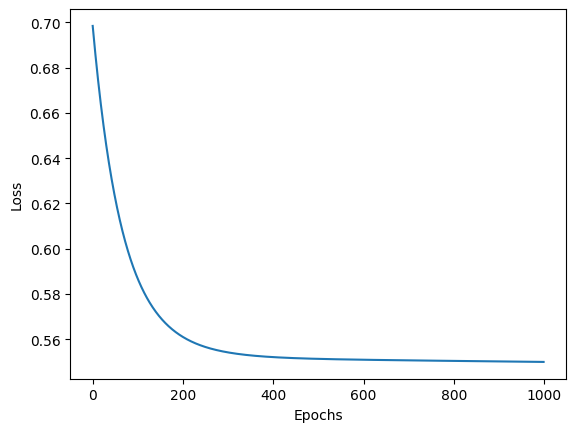

Training Losses are 
          0
0  0.594928
1  0.594013
2  0.593117
3  0.592242
4  0.591385
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


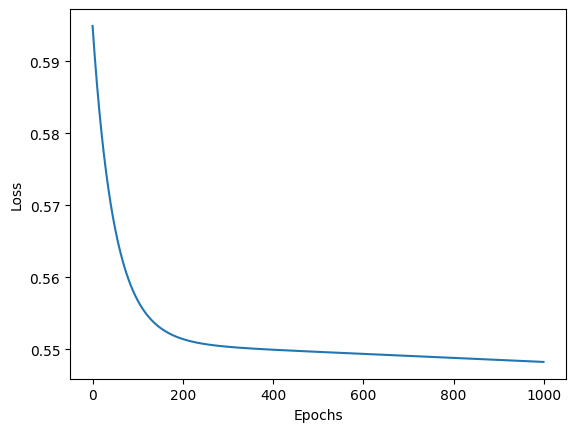

Training Losses are 
          0
0  0.778089
1  0.768383
2  0.759093
3  0.750200
4  0.741690
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


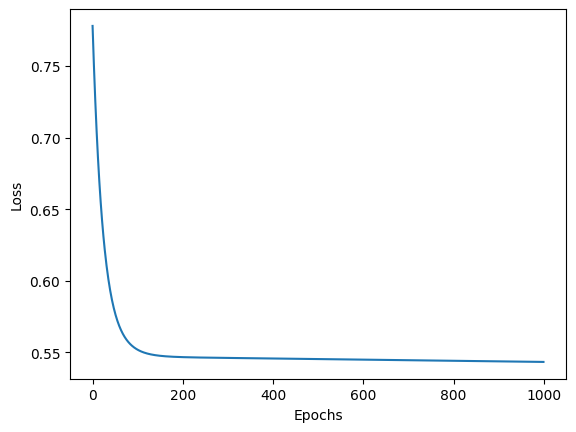

Training Losses are 
          0
0  0.792776
1  0.772959
2  0.754797
3  0.738163
4  0.722934
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


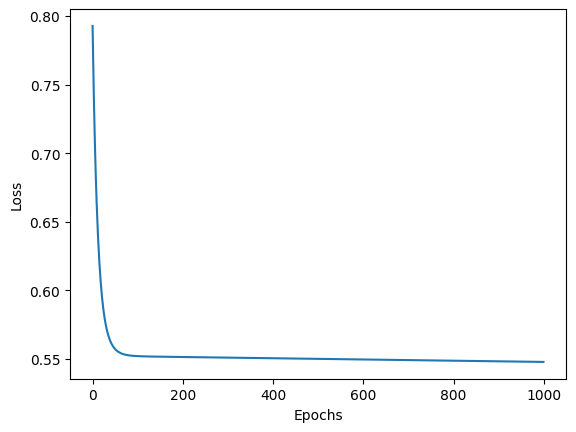

Training Losses are 
          0
0  0.927728
1  0.870056
2  0.820889
3  0.779206
4  0.744009
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


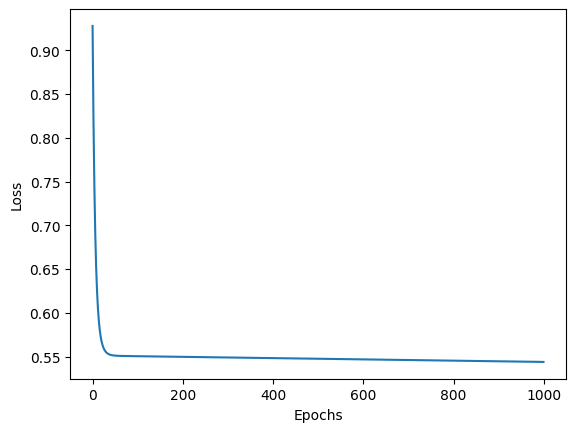

Best accuracy for test data is 0.761 for degree 8


In [13]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(21,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.644589
1  0.643378
2  0.642174
3  0.640978
4  0.639790
Validation Data
Confusion Matrix for hidden layer 8
[[3041    3]
 [ 824  132]]
Accuracy: 0.7933, Precision: 0.9778, Recall: 0.1381, F1-score: 0.2420

Test Data
Confusion Matrix for hiden layer 8
[[3041    3]
 [ 814  142]]
Accuracy: 0.7957, Precision: 0.9793, Recall: 0.1485, F1-score: 0.2579



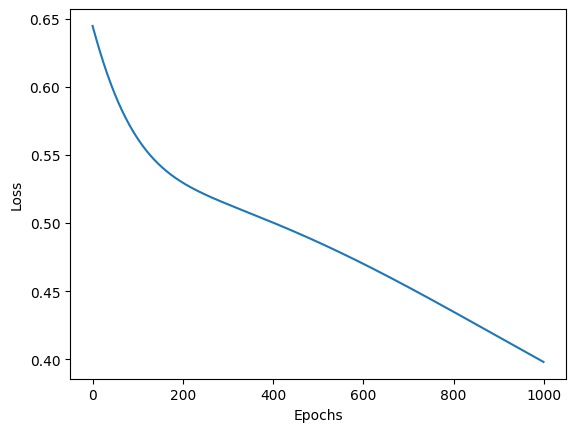

Training Losses are 
          0
0  0.700177
1  0.697478
2  0.694804
3  0.692157
4  0.689535
Validation Data
Confusion Matrix for hidden layer 16
[[3008   36]
 [ 570  386]]
Accuracy: 0.8485, Precision: 0.9147, Recall: 0.4038, F1-score: 0.5602

Test Data
Confusion Matrix for hiden layer 16
[[3013   31]
 [ 567  389]]
Accuracy: 0.8505, Precision: 0.9262, Recall: 0.4069, F1-score: 0.5654



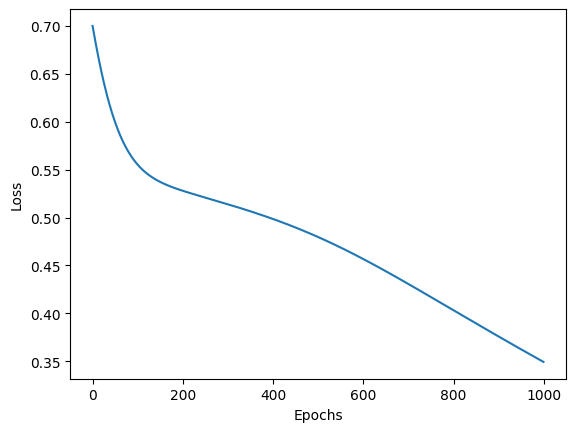

Training Losses are 
          0
0  0.645943
1  0.642128
2  0.638392
3  0.634735
4  0.631159
Validation Data
Confusion Matrix for hidden layer 32
[[3001   43]
 [ 321  635]]
Accuracy: 0.9090, Precision: 0.9366, Recall: 0.6642, F1-score: 0.7772

Test Data
Confusion Matrix for hiden layer 32
[[3000   44]
 [ 308  648]]
Accuracy: 0.9120, Precision: 0.9364, Recall: 0.6778, F1-score: 0.7864



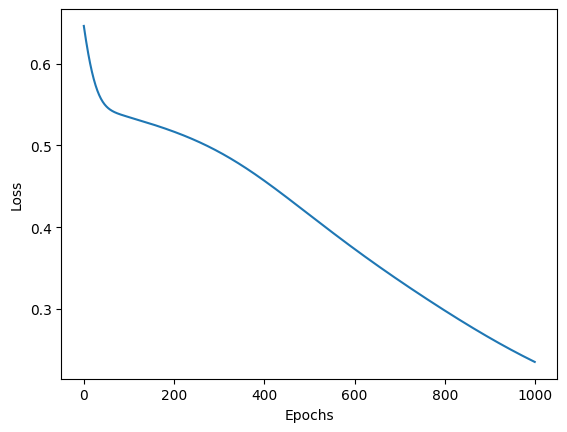

Training Losses are 
          0
0  0.649095
1  0.641622
2  0.634445
3  0.627567
4  0.620990
Validation Data
Confusion Matrix for hidden layer 64
[[2993   51]
 [ 181  775]]
Accuracy: 0.9420, Precision: 0.9383, Recall: 0.8107, F1-score: 0.8698

Test Data
Confusion Matrix for hiden layer 64
[[2987   57]
 [ 172  784]]
Accuracy: 0.9427, Precision: 0.9322, Recall: 0.8201, F1-score: 0.8726



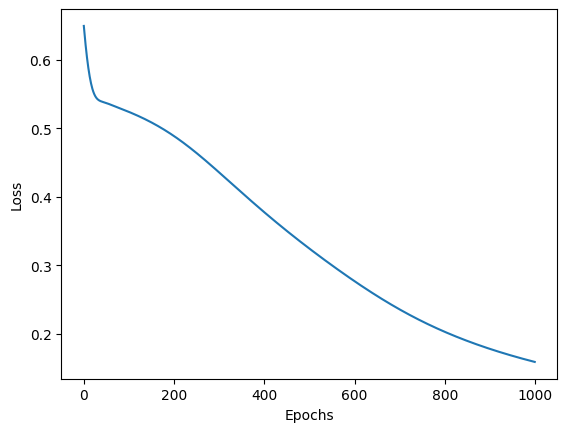

Training Losses are 
          0
0  0.776988
1  0.755046
2  0.734251
3  0.714625
4  0.696185
Validation Data
Confusion Matrix for hidden layer 128
[[2986   58]
 [ 160  796]]
Accuracy: 0.9455, Precision: 0.9321, Recall: 0.8326, F1-score: 0.8796

Test Data
Confusion Matrix for hiden layer 128
[[2987   57]
 [ 157  799]]
Accuracy: 0.9465, Precision: 0.9334, Recall: 0.8358, F1-score: 0.8819



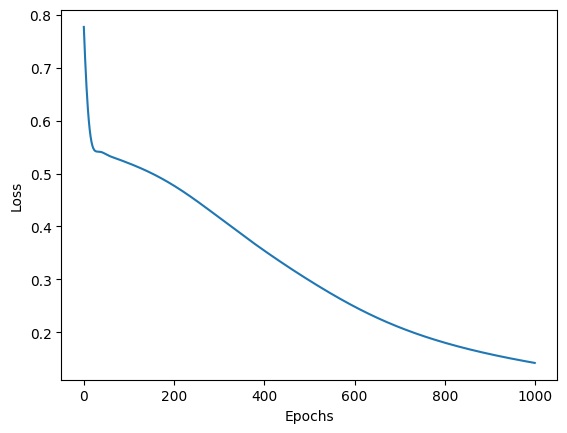

Best accuracy for test data is 0.9465 for degree 128


In [14]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(21,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [15]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.744953
1  0.741950
2  0.738995
3  0.736087
4  0.733225
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


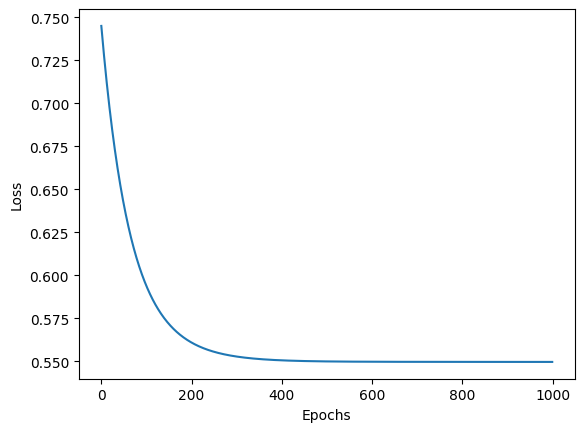

Training Losses are 
          0
0  0.734510
1  0.729820
2  0.725254
3  0.720807
4  0.716478
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


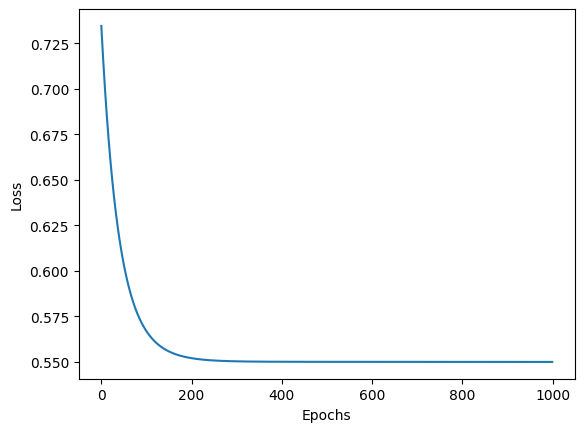

Training Losses are 
          0
0  0.741610
1  0.732824
2  0.724456
3  0.716486
4  0.708895
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


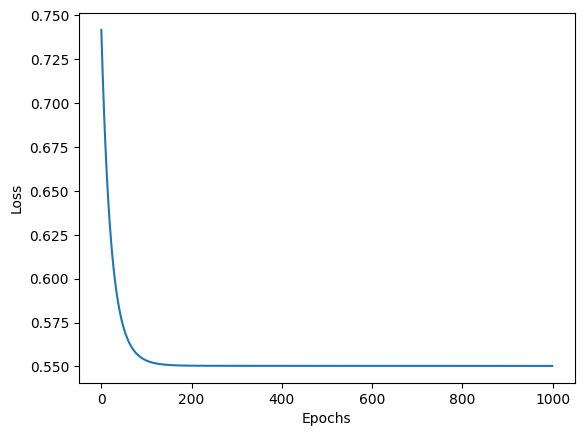

Training Losses are 
          0
0  0.751934
1  0.734635
2  0.718860
3  0.704480
4  0.691374
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


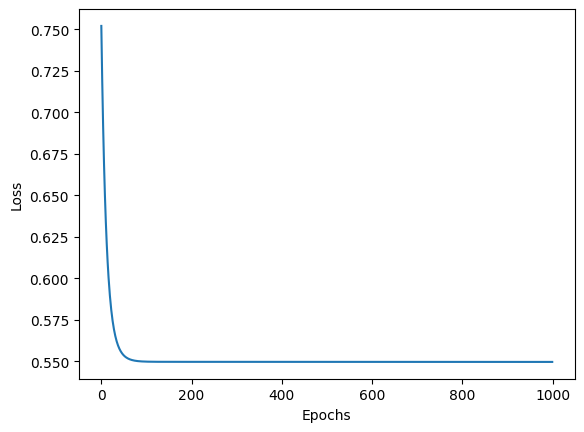

Training Losses are 
          0
0  0.697584
1  0.695535
2  0.693516
3  0.691525
4  0.689563
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


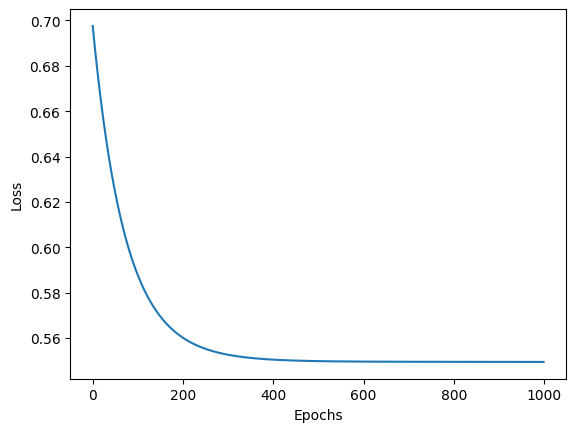

Training Losses are 
          0
0  0.586442
1  0.585620
2  0.584816
3  0.584032
4  0.583267
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


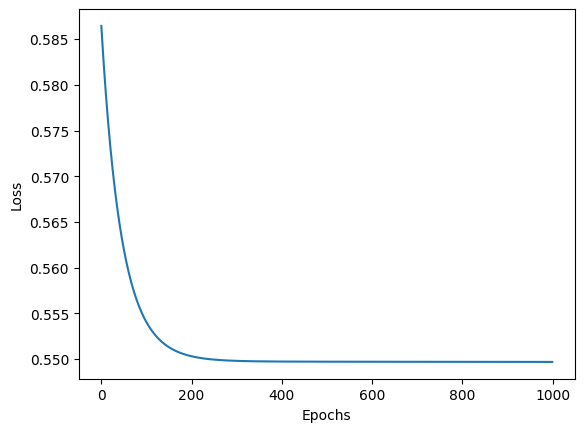

Training Losses are 
          0
0  0.656785
1  0.652327
2  0.648066
3  0.643994
4  0.640101
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


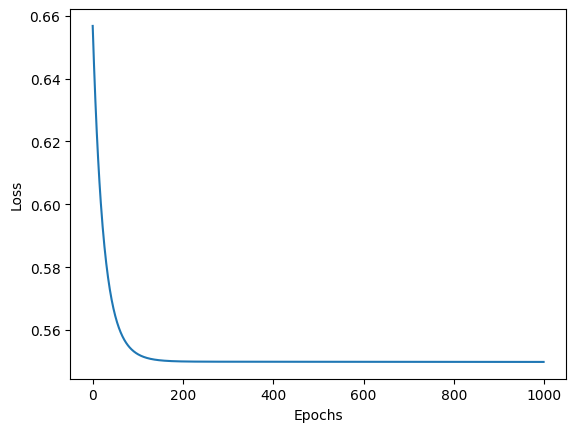

Training Losses are 
          0
0  0.826710
1  0.803458
2  0.782157
3  0.762661
4  0.744832
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


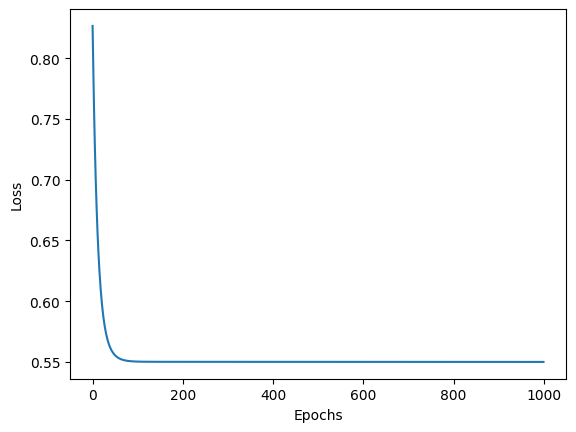

Training Losses are 
          0
0  0.664039
1  0.662430
2  0.660843
3  0.659280
4  0.657740
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


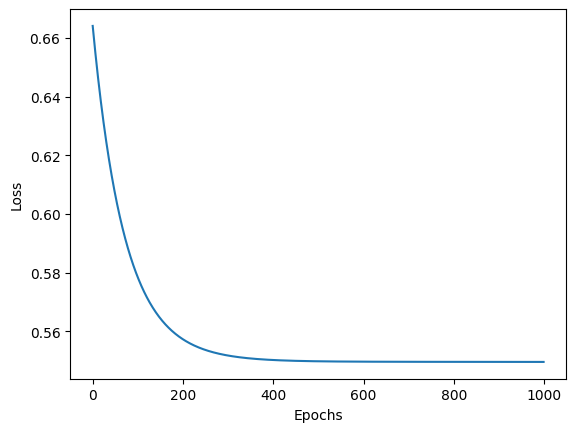

Training Losses are 
          0
0  0.620431
1  0.618581
2  0.616783
3  0.615035
4  0.613335
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


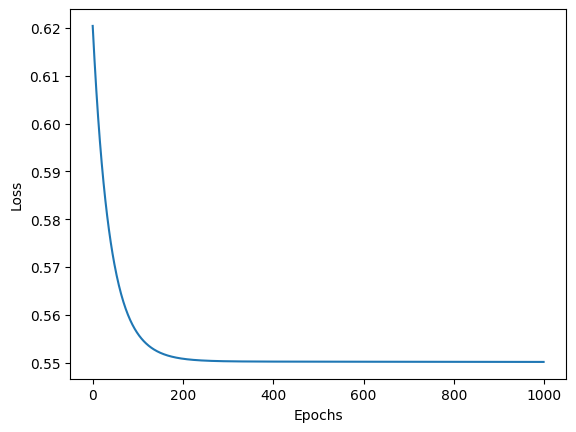

Training Losses are 
          0
0  0.750073
1  0.740692
2  0.731765
3  0.723272
4  0.715191
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


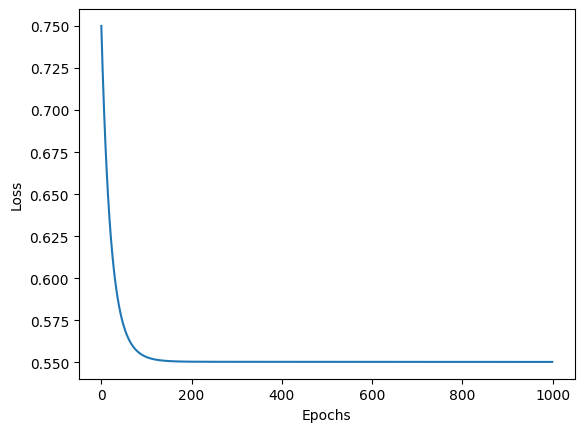

Training Losses are 
          0
0  0.768052
1  0.750191
2  0.733828
3  0.718843
4  0.705125
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


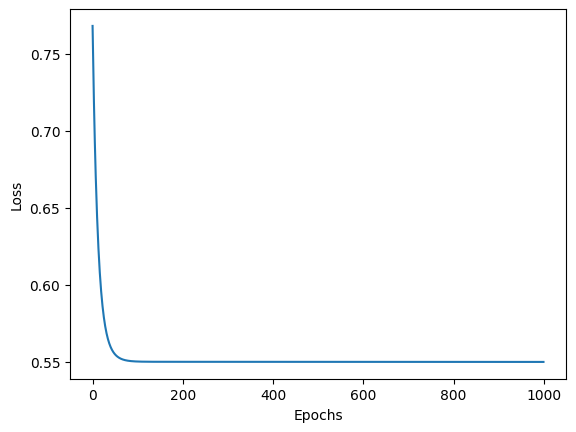

Training Losses are 
          0
0  0.624880
1  0.623742
2  0.622622
3  0.621519
4  0.620433
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


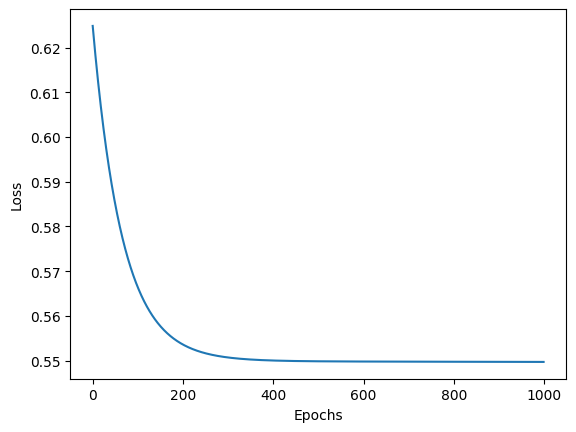

Training Losses are 
          0
0  0.637263
1  0.635135
2  0.633061
3  0.631041
4  0.629072
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


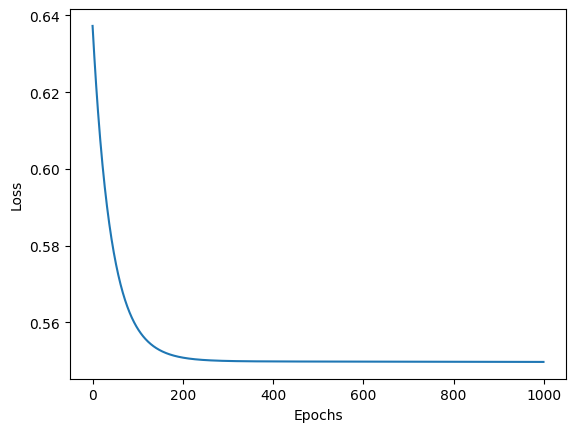

Training Losses are 
          0
0  0.584815
1  0.583410
2  0.582066
3  0.580779
4  0.579547
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


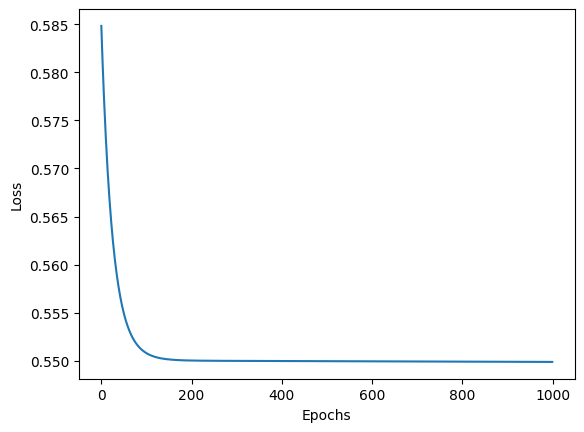

Training Losses are 
          0
0  0.671785
1  0.661675
2  0.652450
3  0.644032
4  0.636348
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


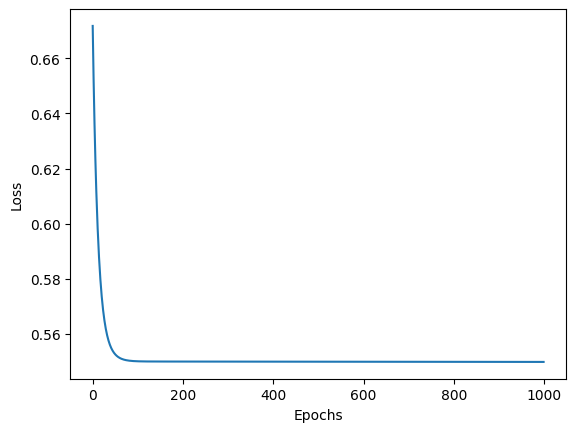

Best accuracy for test data is 0.761 for degree 8 & 8


In [16]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
layer_xyz=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(21,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
        layer_xyz=double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3} & {layer_xyz}")

Training Losses are 
          0
0  0.793652
1  0.791447
2  0.789255
3  0.787076
4  0.784909
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


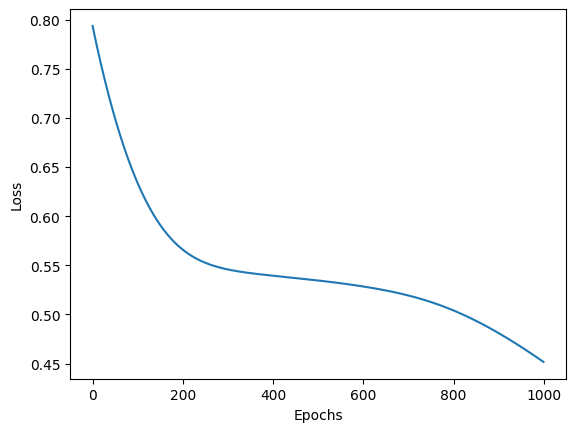

Training Losses are 
          0
0  0.691202
1  0.688330
2  0.685490
3  0.682682
4  0.679907
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2985   59]
 [ 321  635]]
Accuracy: 0.9050, Precision: 0.9150, Recall: 0.6642, F1-score: 0.7697

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2986   58]
 [ 311  645]]
Accuracy: 0.9077, Precision: 0.9175, Recall: 0.6747, F1-score: 0.7776



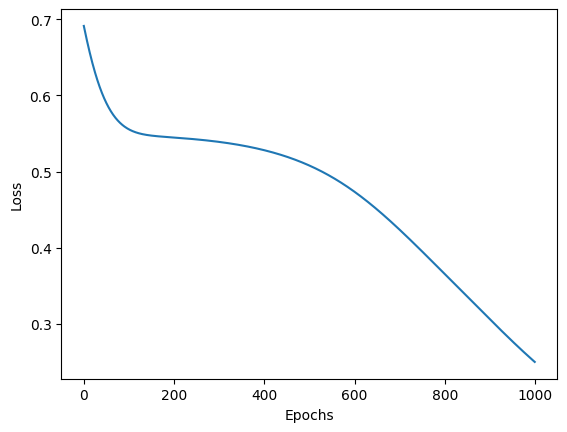

Training Losses are 
          0
0  0.680642
1  0.675724
2  0.670909
3  0.666200
4  0.661597
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2984   60]
 [ 206  750]]
Accuracy: 0.9335, Precision: 0.9259, Recall: 0.7845, F1-score: 0.8494

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2980   64]
 [ 202  754]]
Accuracy: 0.9335, Precision: 0.9218, Recall: 0.7887, F1-score: 0.8501



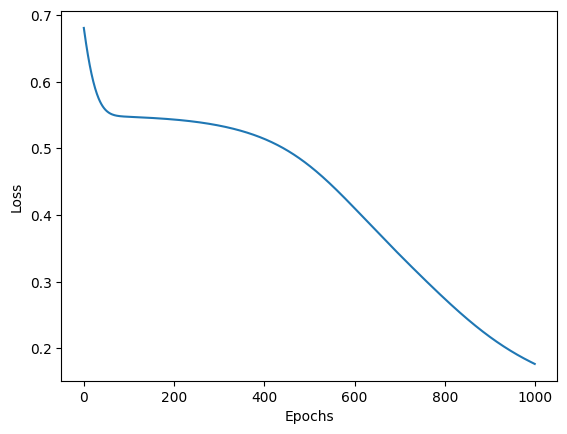

Training Losses are 
          0
0  0.586851
1  0.582038
2  0.577581
3  0.573485
4  0.569748
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2992   52]
 [  69  887]]
Accuracy: 0.9698, Precision: 0.9446, Recall: 0.9278, F1-score: 0.9361

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2987   57]
 [  65  891]]
Accuracy: 0.9695, Precision: 0.9399, Recall: 0.9320, F1-score: 0.9359



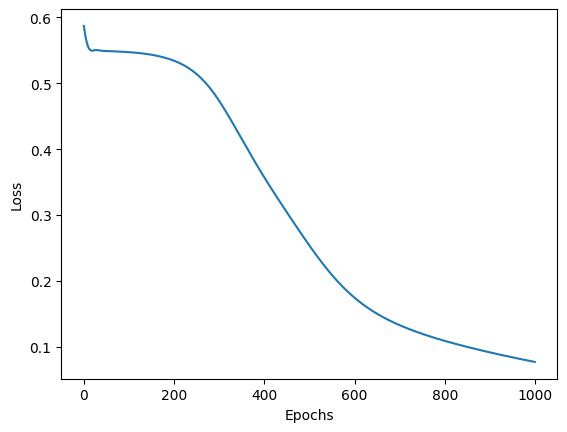

Training Losses are 
          0
0  0.800214
1  0.797476
2  0.794751
3  0.792038
4  0.789338
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3043    1]
 [ 890   66]]
Accuracy: 0.7772, Precision: 0.9851, Recall: 0.0690, F1-score: 0.1290

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 876   80]]
Accuracy: 0.7810, Precision: 1.0000, Recall: 0.0837, F1-score: 0.1544



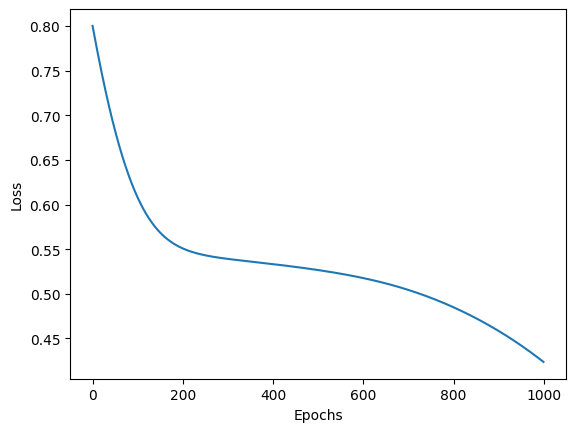

Training Losses are 
          0
0  0.757962
1  0.753776
2  0.749633
3  0.745536
4  0.741483
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3001   43]
 [ 461  495]]
Accuracy: 0.8740, Precision: 0.9201, Recall: 0.5178, F1-score: 0.6627

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3002   42]
 [ 461  495]]
Accuracy: 0.8742, Precision: 0.9218, Recall: 0.5178, F1-score: 0.6631



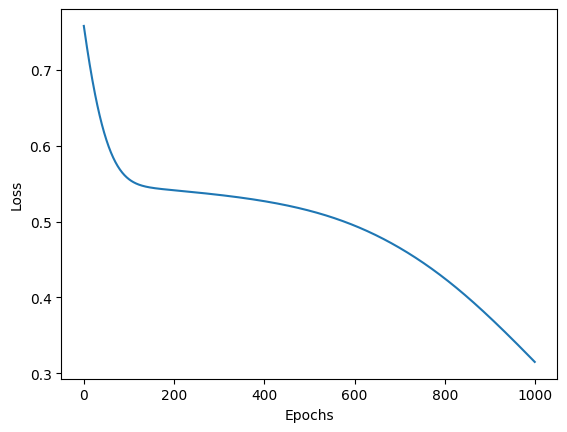

Training Losses are 
          0
0  0.712459
1  0.705714
2  0.699120
3  0.692681
4  0.686398
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2983   61]
 [ 178  778]]
Accuracy: 0.9403, Precision: 0.9273, Recall: 0.8138, F1-score: 0.8669

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2980   64]
 [ 168  788]]
Accuracy: 0.9420, Precision: 0.9249, Recall: 0.8243, F1-score: 0.8717



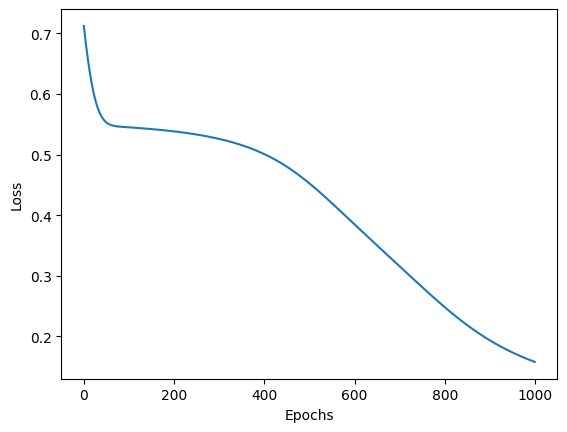

Training Losses are 
          0
0  0.732757
1  0.720259
2  0.708232
3  0.696684
4  0.685623
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2976   68]
 [ 104  852]]
Accuracy: 0.9570, Precision: 0.9261, Recall: 0.8912, F1-score: 0.9083

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2980   64]
 [ 118  838]]
Accuracy: 0.9545, Precision: 0.9290, Recall: 0.8766, F1-score: 0.9020



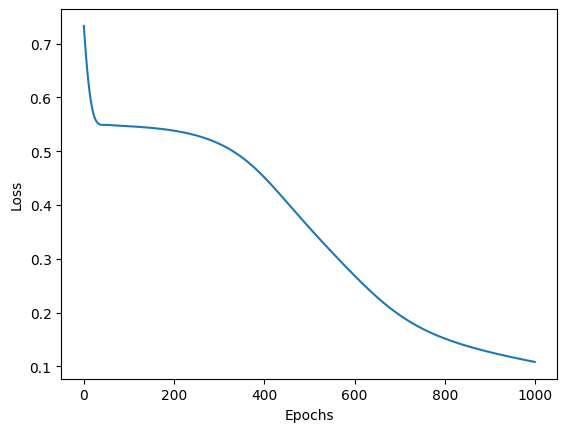

Training Losses are 
          0
0  0.654887
1  0.652740
2  0.650612
3  0.648506
4  0.646420
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2993   51]
 [ 209  747]]
Accuracy: 0.9350, Precision: 0.9361, Recall: 0.7814, F1-score: 0.8518

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2986   58]
 [ 197  759]]
Accuracy: 0.9363, Precision: 0.9290, Recall: 0.7939, F1-score: 0.8562



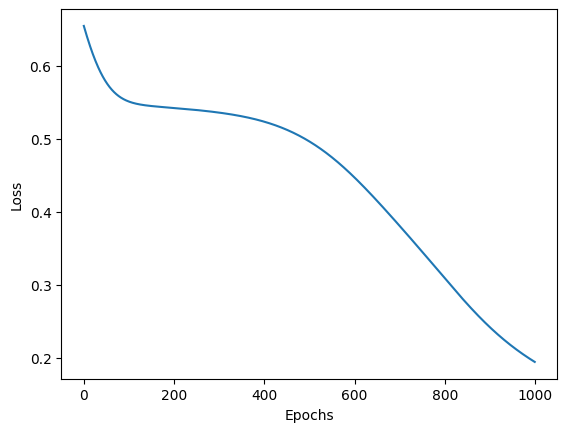

Training Losses are 
          0
0  0.818744
1  0.812675
2  0.806686
3  0.800778
4  0.794952
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2988   56]
 [ 327  629]]
Accuracy: 0.9042, Precision: 0.9182, Recall: 0.6579, F1-score: 0.7666

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2989   55]
 [ 318  638]]
Accuracy: 0.9067, Precision: 0.9206, Recall: 0.6674, F1-score: 0.7738



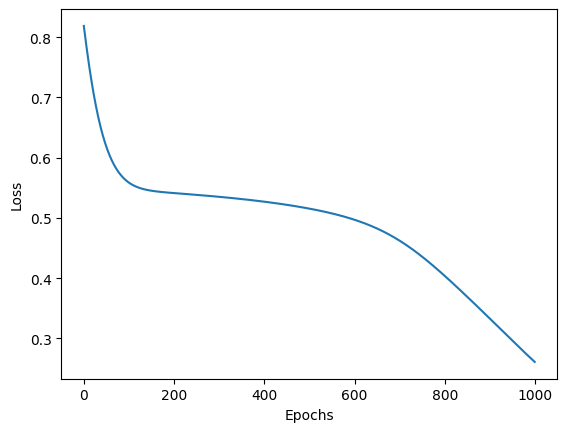

Training Losses are 
          0
0  0.732764
1  0.724006
2  0.715482
3  0.707195
4  0.699146
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2980   64]
 [ 122  834]]
Accuracy: 0.9535, Precision: 0.9287, Recall: 0.8724, F1-score: 0.8997

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2981   63]
 [ 130  826]]
Accuracy: 0.9517, Precision: 0.9291, Recall: 0.8640, F1-score: 0.8954



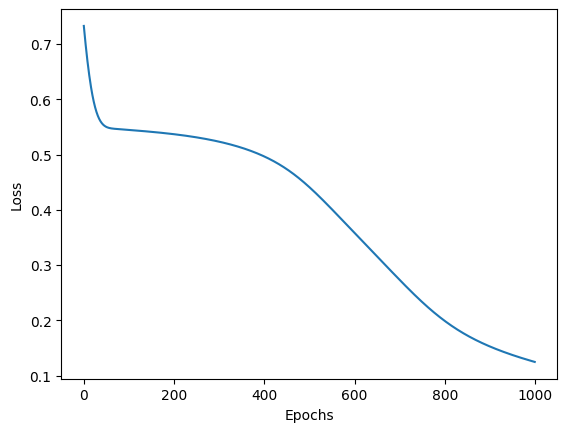

Training Losses are 
          0
0  0.787313
1  0.771550
2  0.756370
3  0.741783
4  0.727796
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2984   60]
 [  94  862]]
Accuracy: 0.9615, Precision: 0.9349, Recall: 0.9017, F1-score: 0.9180

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2981   63]
 [  96  860]]
Accuracy: 0.9603, Precision: 0.9317, Recall: 0.8996, F1-score: 0.9154



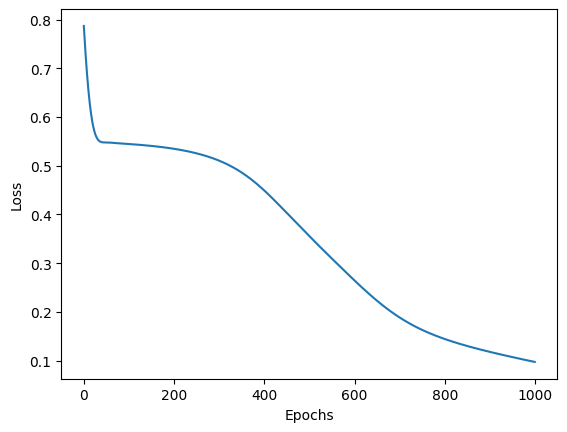

Training Losses are 
          0
0  0.740188
1  0.734332
2  0.728598
3  0.722989
4  0.717508
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2986   58]
 [ 228  728]]
Accuracy: 0.9285, Precision: 0.9262, Recall: 0.7615, F1-score: 0.8358

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2982   62]
 [ 223  733]]
Accuracy: 0.9287, Precision: 0.9220, Recall: 0.7667, F1-score: 0.8372



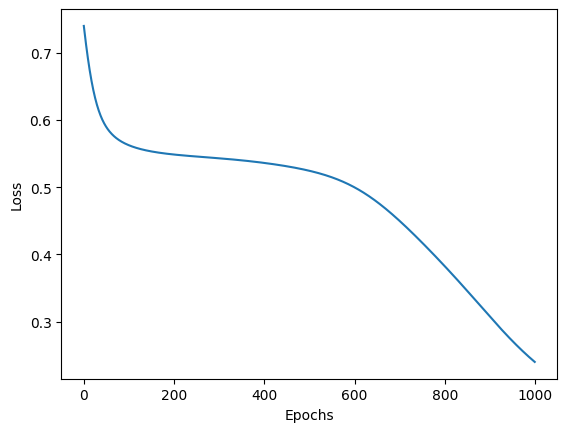

Training Losses are 
          0
0  0.684151
1  0.678834
2  0.673637
3  0.668565
4  0.663620
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2991   53]
 [  71  885]]
Accuracy: 0.9690, Precision: 0.9435, Recall: 0.9257, F1-score: 0.9345

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2986   58]
 [  69  887]]
Accuracy: 0.9683, Precision: 0.9386, Recall: 0.9278, F1-score: 0.9332



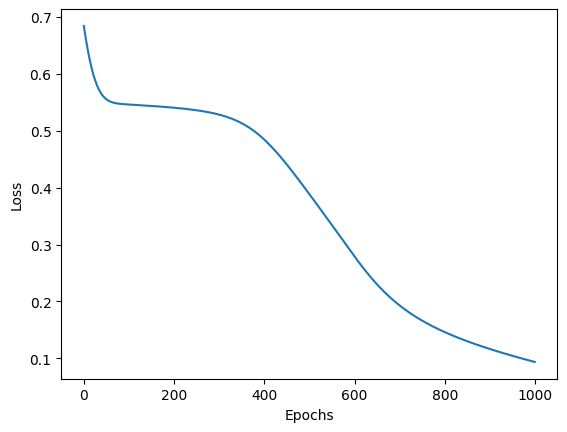

Training Losses are 
          0
0  0.793213
1  0.780184
2  0.767565
3  0.755367
4  0.743594
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2992   52]
 [  74  882]]
Accuracy: 0.9685, Precision: 0.9443, Recall: 0.9226, F1-score: 0.9333

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2986   58]
 [  71  885]]
Accuracy: 0.9677, Precision: 0.9385, Recall: 0.9257, F1-score: 0.9321



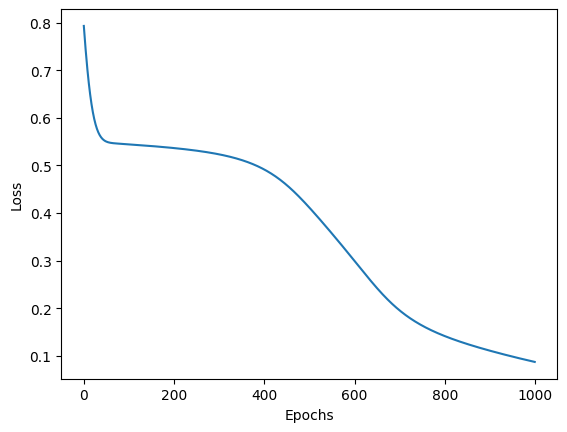

Training Losses are 
          0
0  0.941806
1  0.912514
2  0.884440
3  0.857616
4  0.832067
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2994   50]
 [  66  890]]
Accuracy: 0.9710, Precision: 0.9468, Recall: 0.9310, F1-score: 0.9388

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2988   56]
 [  62  894]]
Accuracy: 0.9705, Precision: 0.9411, Recall: 0.9351, F1-score: 0.9381



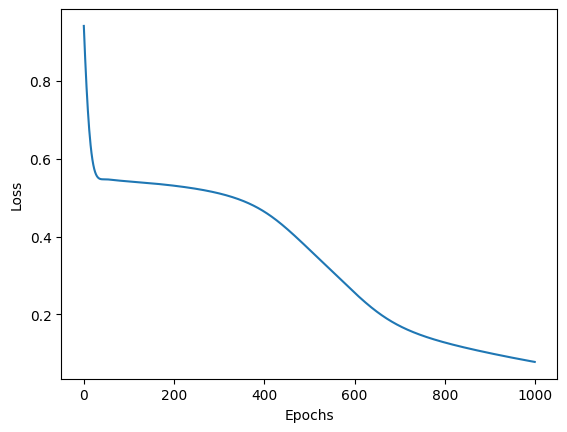

Best accuracy for test data is 0.9705 for degree 64 & 64


In [17]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(21,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [18]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.649750
1  0.648374
2  0.647009
3  0.645654
4  0.644309
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3017   27]
 [ 572  384]]
Accuracy: 0.8502, Precision: 0.9343, Recall: 0.4017, F1-score: 0.5618

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3022   22]
 [ 568  388]]
Accuracy: 0.8525, Precision: 0.9463, Recall: 0.4059, F1-score: 0.5681



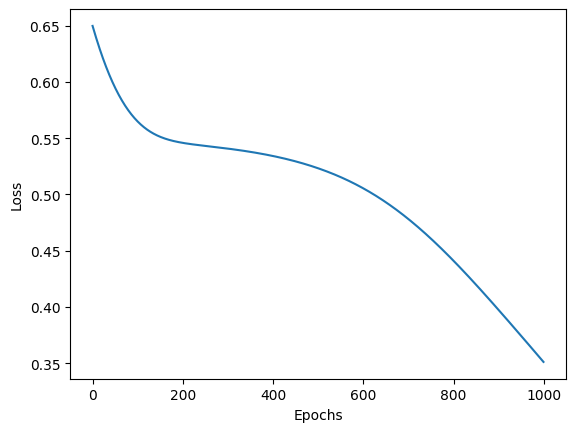

Training Losses are 
          0
0  0.616429
1  0.615367
2  0.614312
3  0.613264
4  0.612225
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3041    3]
 [ 776  180]]
Accuracy: 0.8053, Precision: 0.9836, Recall: 0.1883, F1-score: 0.3161

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3040    4]
 [ 779  177]]
Accuracy: 0.8043, Precision: 0.9779, Recall: 0.1851, F1-score: 0.3113



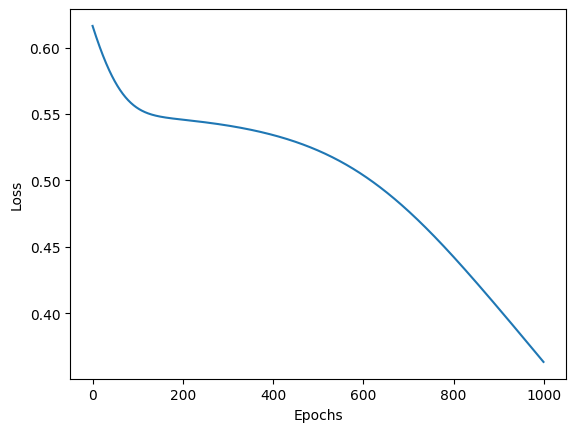

Training Losses are 
          0
0  0.660286
1  0.658708
2  0.657142
3  0.655586
4  0.654041
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3025   19]
 [ 614  342]]
Accuracy: 0.8417, Precision: 0.9474, Recall: 0.3577, F1-score: 0.5194

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3027   17]
 [ 608  348]]
Accuracy: 0.8438, Precision: 0.9534, Recall: 0.3640, F1-score: 0.5269



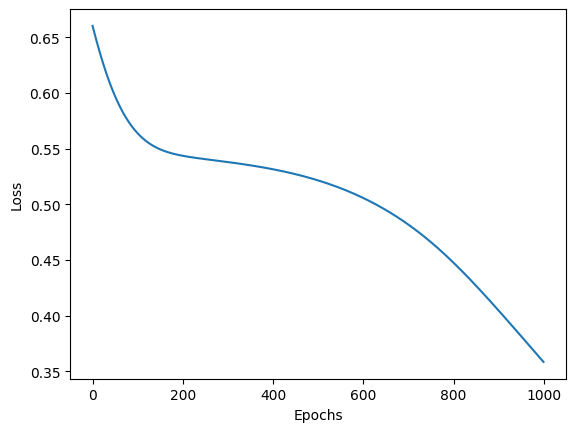

Training Losses are 
          0
0  0.851728
1  0.848920
2  0.846127
3  0.843347
4  0.840582
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


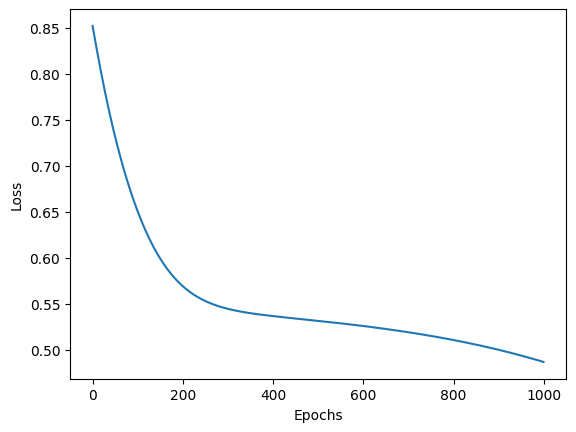

Training Losses are 
          0
0  0.620493
1  0.618551
2  0.616636
3  0.614749
4  0.612890
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3004   40]
 [ 335  621]]
Accuracy: 0.9062, Precision: 0.9395, Recall: 0.6496, F1-score: 0.7681

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3005   39]
 [ 335  621]]
Accuracy: 0.9065, Precision: 0.9409, Recall: 0.6496, F1-score: 0.7686



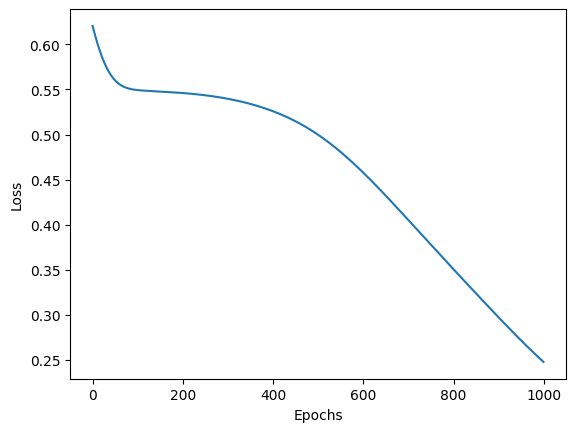

Training Losses are 
          0
0  0.609966
1  0.608042
2  0.606151
3  0.604293
4  0.602467
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2995   49]
 [ 273  683]]
Accuracy: 0.9195, Precision: 0.9331, Recall: 0.7144, F1-score: 0.8092

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2986   58]
 [ 266  690]]
Accuracy: 0.9190, Precision: 0.9225, Recall: 0.7218, F1-score: 0.8099



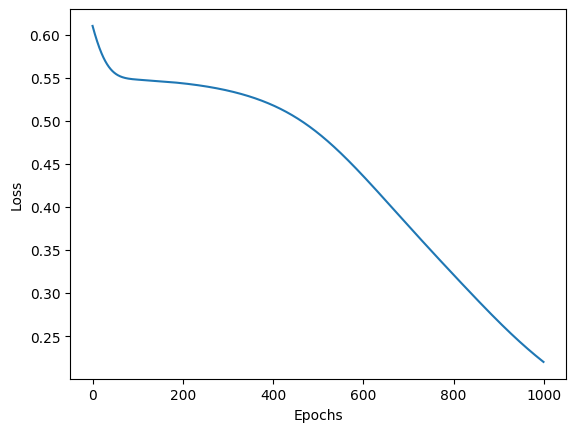

Training Losses are 
          0
0  0.921954
1  0.917075
2  0.912239
3  0.907445
4  0.902694
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


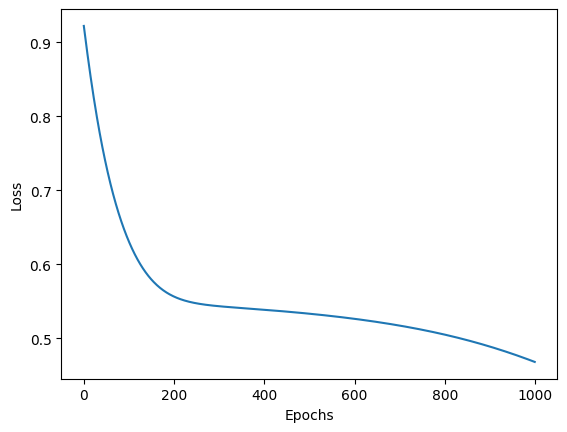

Training Losses are 
          0
0  0.855936
1  0.851587
2  0.847272
3  0.842990
4  0.838743
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 939   17]]
Accuracy: 0.7652, Precision: 1.0000, Recall: 0.0178, F1-score: 0.0349

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 940   16]]
Accuracy: 0.7650, Precision: 1.0000, Recall: 0.0167, F1-score: 0.0329



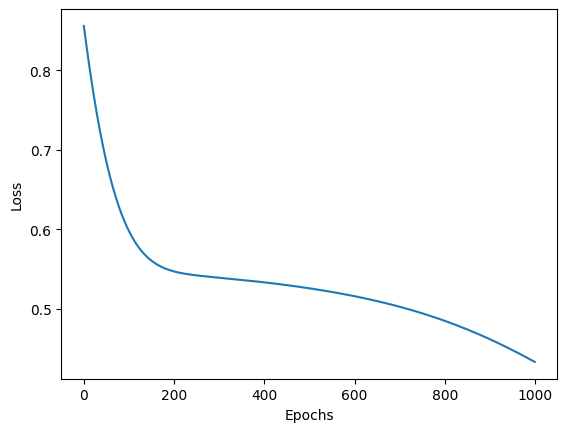

Training Losses are 
          0
0  0.706874
1  0.701292
2  0.695816
3  0.690450
4  0.685194
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2983   61]
 [ 214  742]]
Accuracy: 0.9313, Precision: 0.9240, Recall: 0.7762, F1-score: 0.8437

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2980   64]
 [ 207  749]]
Accuracy: 0.9323, Precision: 0.9213, Recall: 0.7835, F1-score: 0.8468



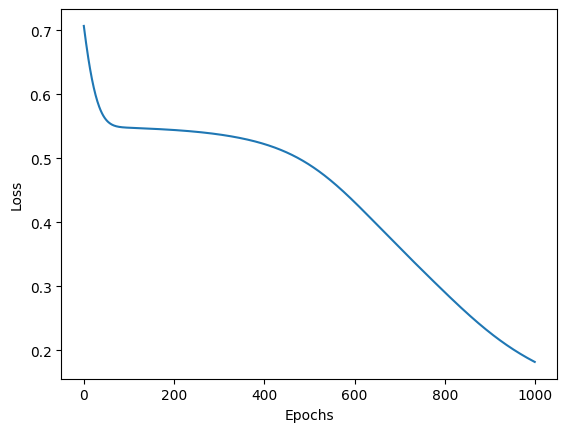

Training Losses are 
          0
0  0.717117
1  0.711404
2  0.705798
3  0.700300
4  0.694913
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2986   58]
 [ 253  703]]
Accuracy: 0.9223, Precision: 0.9238, Recall: 0.7354, F1-score: 0.8189

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2981   63]
 [ 258  698]]
Accuracy: 0.9197, Precision: 0.9172, Recall: 0.7301, F1-score: 0.8130



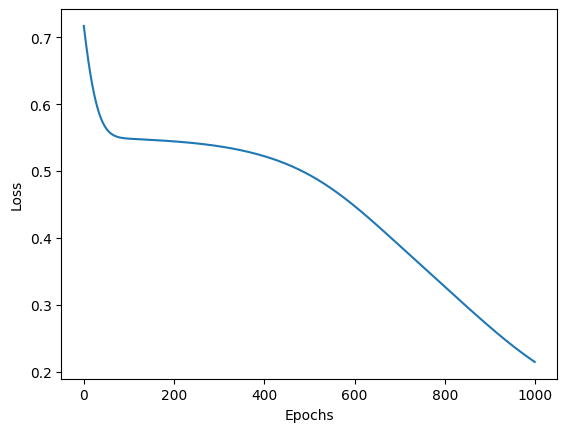

Training Losses are 
          0
0  0.710826
1  0.705316
2  0.699906
3  0.694597
4  0.689392
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2988   56]
 [ 248  708]]
Accuracy: 0.9240, Precision: 0.9267, Recall: 0.7406, F1-score: 0.8233

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2982   62]
 [ 254  702]]
Accuracy: 0.9210, Precision: 0.9188, Recall: 0.7343, F1-score: 0.8163



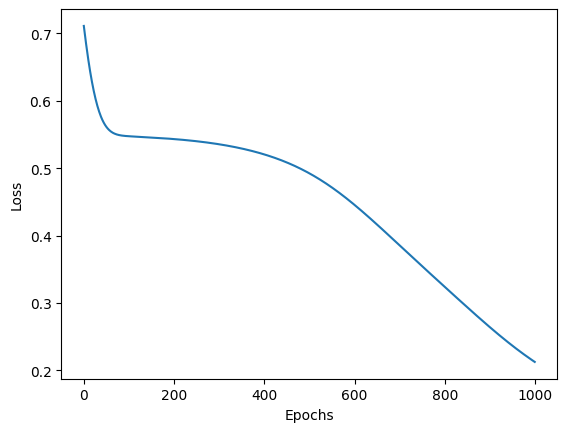

Training Losses are 
          0
0  0.679793
1  0.674576
2  0.669471
3  0.664481
4  0.659608
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2987   57]
 [ 218  738]]
Accuracy: 0.9313, Precision: 0.9283, Recall: 0.7720, F1-score: 0.8429

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2984   60]
 [ 204  752]]
Accuracy: 0.9340, Precision: 0.9261, Recall: 0.7866, F1-score: 0.8507



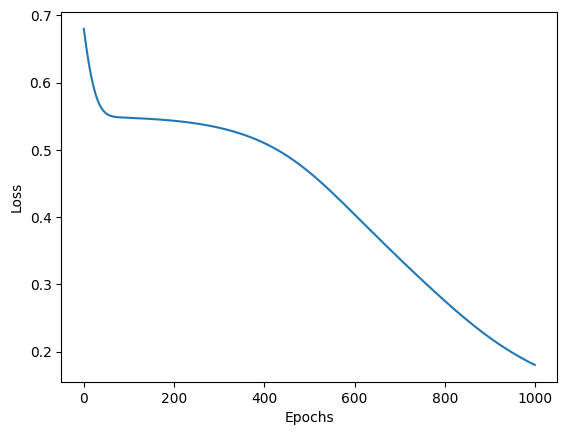

Training Losses are 
          0
0  0.631538
1  0.624253
2  0.617333
3  0.610784
4  0.604609
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2974   70]
 [ 114  842]]
Accuracy: 0.9540, Precision: 0.9232, Recall: 0.8808, F1-score: 0.9015

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2978   66]
 [ 131  825]]
Accuracy: 0.9507, Precision: 0.9259, Recall: 0.8630, F1-score: 0.8933



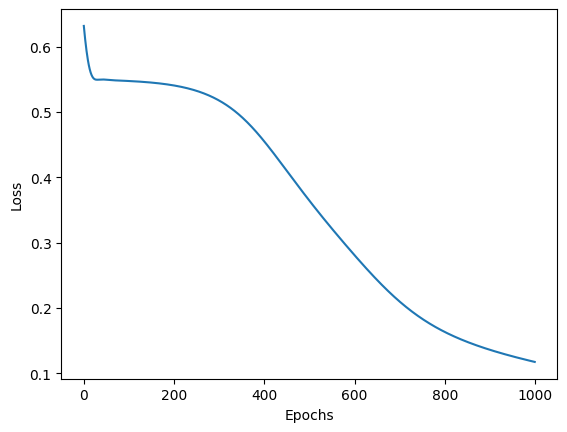

Training Losses are 
          0
0  0.766140
1  0.754405
2  0.743017
3  0.731980
4  0.721301
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2975   69]
 [ 147  809]]
Accuracy: 0.9460, Precision: 0.9214, Recall: 0.8462, F1-score: 0.8822

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2977   67]
 [ 151  805]]
Accuracy: 0.9455, Precision: 0.9232, Recall: 0.8421, F1-score: 0.8807



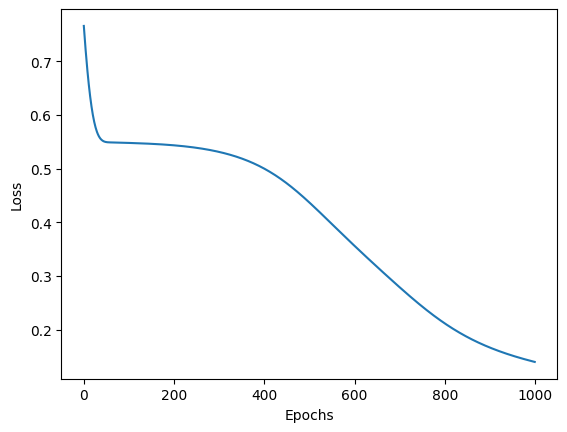

Training Losses are 
          0
0  0.687178
1  0.678078
2  0.669314
3  0.660892
4  0.652814
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2968   76]
 [ 128  828]]
Accuracy: 0.9490, Precision: 0.9159, Recall: 0.8661, F1-score: 0.8903

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2970   74]
 [ 135  821]]
Accuracy: 0.9477, Precision: 0.9173, Recall: 0.8588, F1-score: 0.8871



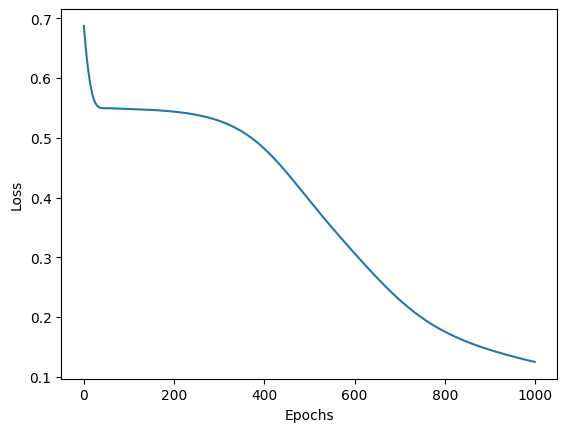

Training Losses are 
          0
0  0.704340
1  0.694332
2  0.684682
3  0.675396
4  0.666480
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2974   70]
 [ 124  832]]
Accuracy: 0.9515, Precision: 0.9224, Recall: 0.8703, F1-score: 0.8956

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2978   66]
 [ 135  821]]
Accuracy: 0.9497, Precision: 0.9256, Recall: 0.8588, F1-score: 0.8909



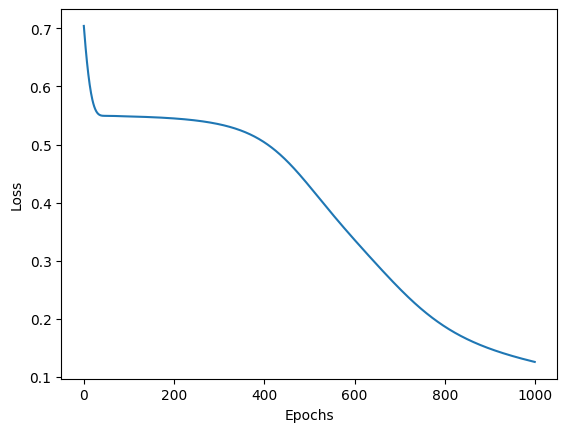

Training Losses are 
          0
0  0.585653
1  0.584578
2  0.583518
3  0.582475
4  0.581448
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2980   64]
 [ 154  802]]
Accuracy: 0.9455, Precision: 0.9261, Recall: 0.8389, F1-score: 0.8804

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2982   62]
 [ 151  805]]
Accuracy: 0.9467, Precision: 0.9285, Recall: 0.8421, F1-score: 0.8832



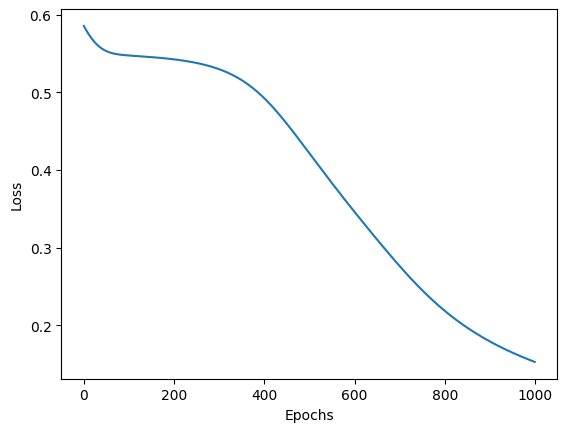

Training Losses are 
          0
0  0.714611
1  0.712218
2  0.709844
3  0.707488
4  0.705152
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3027   17]
 [ 644  312]]
Accuracy: 0.8347, Precision: 0.9483, Recall: 0.3264, F1-score: 0.4856

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3028   16]
 [ 651  305]]
Accuracy: 0.8333, Precision: 0.9502, Recall: 0.3190, F1-score: 0.4777



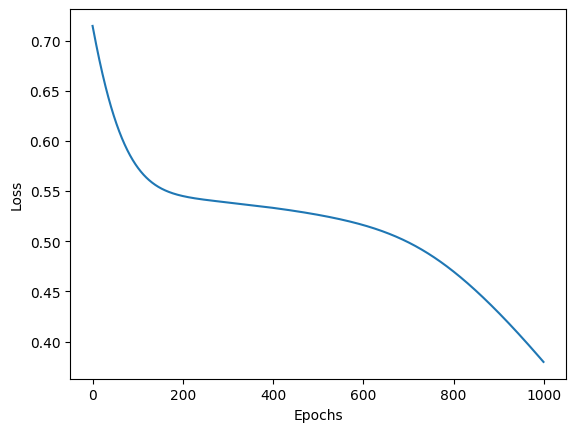

Training Losses are 
          0
0  0.636370
1  0.634531
2  0.632714
3  0.630918
4  0.629143
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2989   55]
 [ 341  615]]
Accuracy: 0.9010, Precision: 0.9179, Recall: 0.6433, F1-score: 0.7565

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2992   52]
 [ 331  625]]
Accuracy: 0.9042, Precision: 0.9232, Recall: 0.6538, F1-score: 0.7655



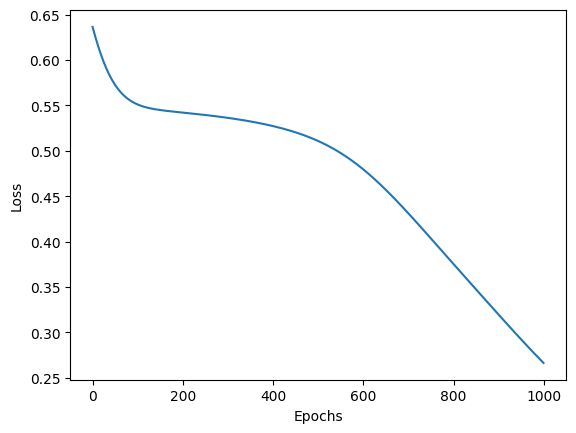

Training Losses are 
          0
0  0.660548
1  0.658711
2  0.656893
3  0.655095
4  0.653315
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2995   49]
 [ 359  597]]
Accuracy: 0.8980, Precision: 0.9241, Recall: 0.6245, F1-score: 0.7453

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2995   49]
 [ 352  604]]
Accuracy: 0.8998, Precision: 0.9250, Recall: 0.6318, F1-score: 0.7508



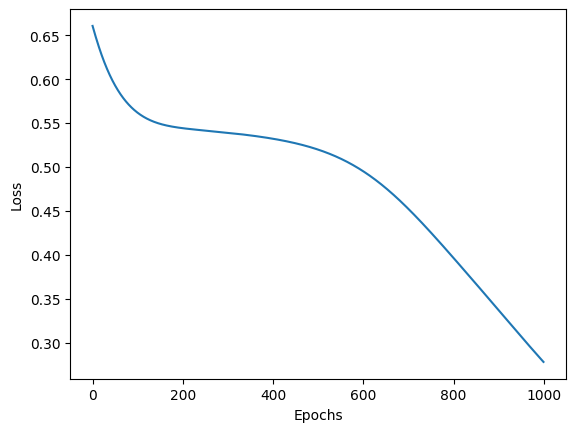

Training Losses are 
          0
0  0.882028
1  0.876712
2  0.871446
3  0.866230
4  0.861065
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3042    2]
 [ 844  112]]
Accuracy: 0.7885, Precision: 0.9825, Recall: 0.1172, F1-score: 0.2093

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3042    2]
 [ 829  127]]
Accuracy: 0.7923, Precision: 0.9845, Recall: 0.1328, F1-score: 0.2341



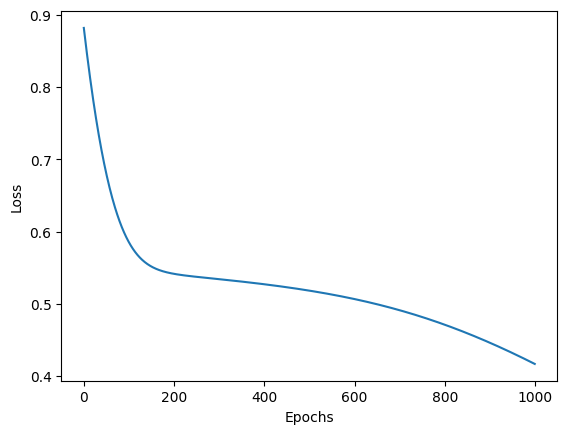

Training Losses are 
          0
0  0.732131
1  0.728147
2  0.724213
3  0.720331
4  0.716499
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2996   48]
 [ 386  570]]
Accuracy: 0.8915, Precision: 0.9223, Recall: 0.5962, F1-score: 0.7243

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2998   46]
 [ 371  585]]
Accuracy: 0.8958, Precision: 0.9271, Recall: 0.6119, F1-score: 0.7372



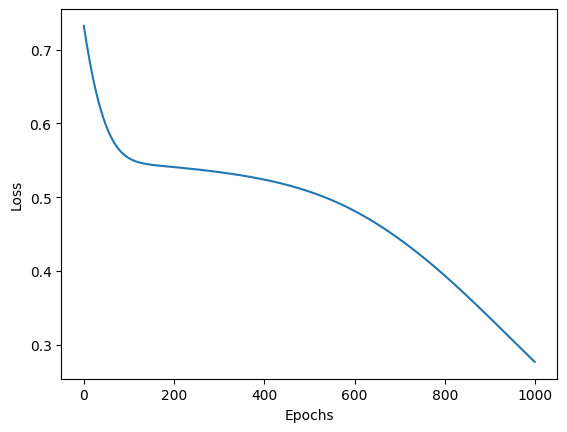

Training Losses are 
          0
0  0.591288
1  0.589262
2  0.587289
3  0.585370
4  0.583506
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2976   68]
 [ 106  850]]
Accuracy: 0.9565, Precision: 0.9259, Recall: 0.8891, F1-score: 0.9072

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2980   64]
 [ 120  836]]
Accuracy: 0.9540, Precision: 0.9289, Recall: 0.8745, F1-score: 0.9009



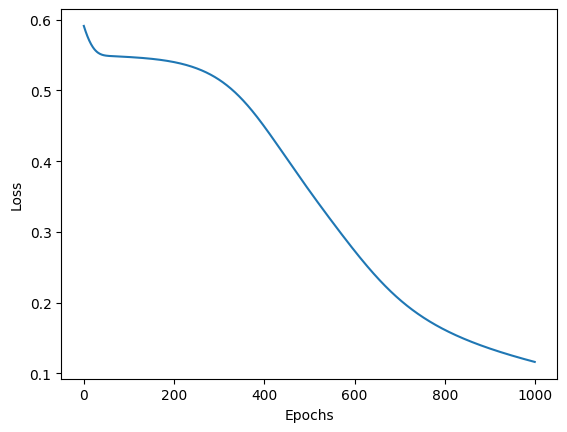

Training Losses are 
          0
0  0.739811
1  0.735796
2  0.731823
3  0.727892
4  0.724004
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2994   50]
 [ 337  619]]
Accuracy: 0.9032, Precision: 0.9253, Recall: 0.6475, F1-score: 0.7618

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2995   49]
 [ 335  621]]
Accuracy: 0.9040, Precision: 0.9269, Recall: 0.6496, F1-score: 0.7638



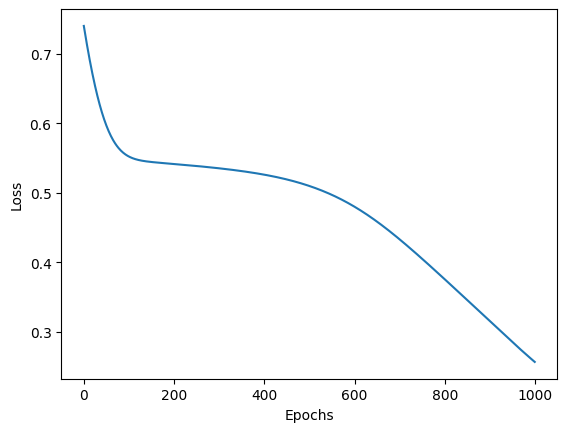

Training Losses are 
          0
0  0.761020
1  0.753323
2  0.745780
3  0.738392
4  0.731161
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2989   55]
 [ 281  675]]
Accuracy: 0.9160, Precision: 0.9247, Recall: 0.7061, F1-score: 0.8007

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2989   55]
 [ 278  678]]
Accuracy: 0.9167, Precision: 0.9250, Recall: 0.7092, F1-score: 0.8028



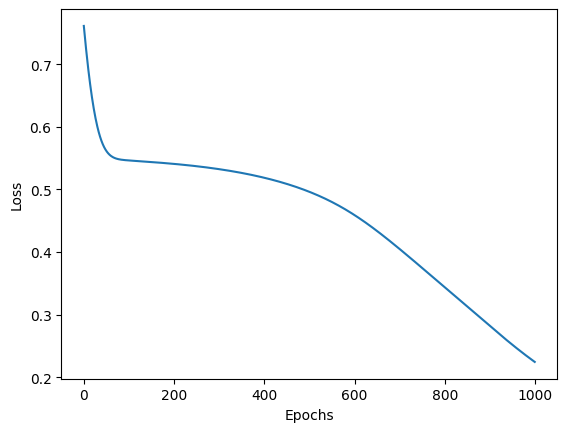

Training Losses are 
          0
0  0.597286
1  0.594131
2  0.591091
3  0.588168
4  0.585363
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2981   63]
 [  94  862]]
Accuracy: 0.9607, Precision: 0.9319, Recall: 0.9017, F1-score: 0.9165

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2979   65]
 [  97  859]]
Accuracy: 0.9595, Precision: 0.9297, Recall: 0.8985, F1-score: 0.9138



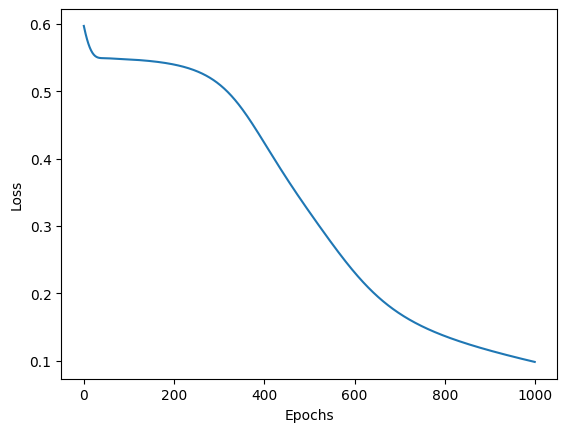

Training Losses are 
          0
0  0.558498
1  0.557043
2  0.555726
3  0.554547
4  0.553506
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3010   34]
 [  41  915]]
Accuracy: 0.9812, Precision: 0.9642, Recall: 0.9571, F1-score: 0.9606

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3003   41]
 [  45  911]]
Accuracy: 0.9785, Precision: 0.9569, Recall: 0.9529, F1-score: 0.9549



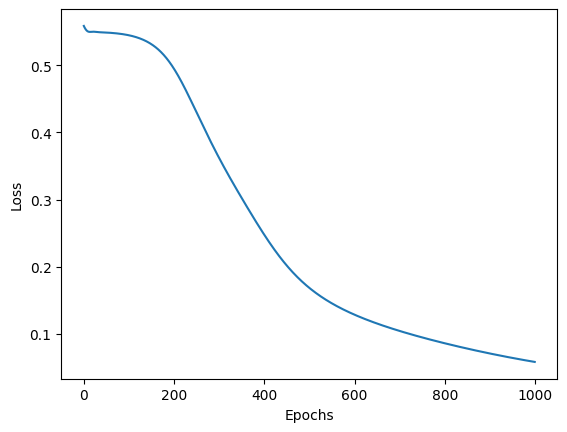

Training Losses are 
          0
0  0.694390
1  0.688757
2  0.683240
3  0.677840
4  0.672560
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2977   67]
 [ 123  833]]
Accuracy: 0.9525, Precision: 0.9256, Recall: 0.8713, F1-score: 0.8976

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2978   66]
 [ 134  822]]
Accuracy: 0.9500, Precision: 0.9257, Recall: 0.8598, F1-score: 0.8915



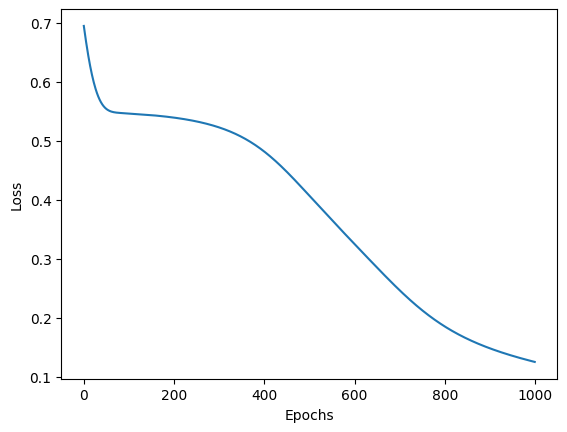

Training Losses are 
          0
0  0.676763
1  0.666552
2  0.656801
3  0.647515
4  0.638701
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2980   64]
 [  93  863]]
Accuracy: 0.9607, Precision: 0.9310, Recall: 0.9027, F1-score: 0.9166

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2979   65]
 [  96  860]]
Accuracy: 0.9597, Precision: 0.9297, Recall: 0.8996, F1-score: 0.9144



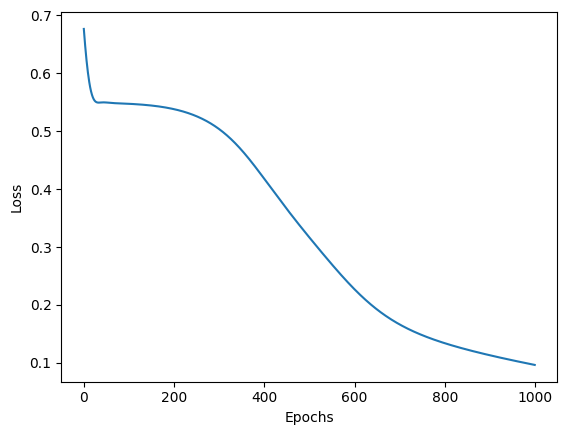

Training Losses are 
          0
0  0.700440
1  0.689422
2  0.678856
3  0.668750
4  0.659106
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2983   61]
 [  88  868]]
Accuracy: 0.9627, Precision: 0.9343, Recall: 0.9079, F1-score: 0.9210

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2981   63]
 [  90  866]]
Accuracy: 0.9617, Precision: 0.9322, Recall: 0.9059, F1-score: 0.9188



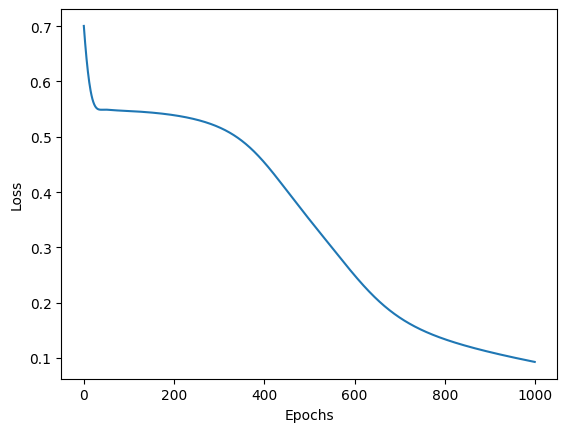

Training Losses are 
          0
0  0.658160
1  0.648748
2  0.639805
3  0.631336
4  0.623343
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2989   55]
 [  79  877]]
Accuracy: 0.9665, Precision: 0.9410, Recall: 0.9174, F1-score: 0.9290

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2984   60]
 [  83  873]]
Accuracy: 0.9643, Precision: 0.9357, Recall: 0.9132, F1-score: 0.9243



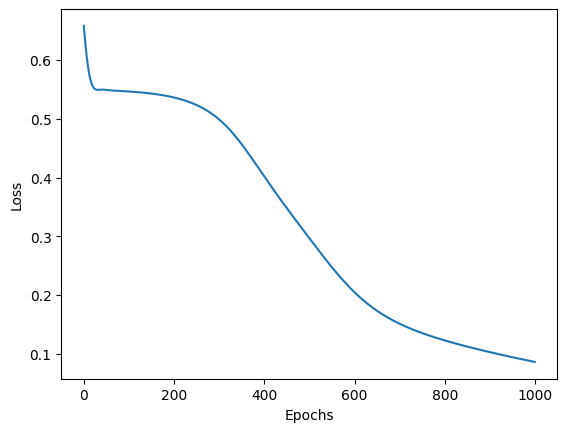

Training Losses are 
          0
0  0.750089
1  0.737163
2  0.724700
3  0.712707
4  0.701191
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2978   66]
 [ 139  817]]
Accuracy: 0.9487, Precision: 0.9253, Recall: 0.8546, F1-score: 0.8885

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2981   63]
 [ 144  812]]
Accuracy: 0.9483, Precision: 0.9280, Recall: 0.8494, F1-score: 0.8869



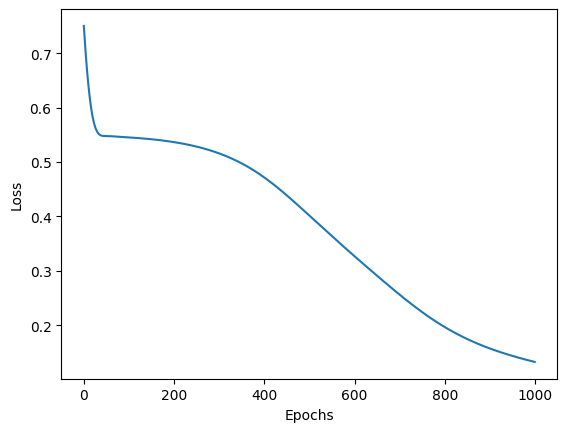

Training Losses are 
          0
0  0.662836
1  0.660351
2  0.657890
3  0.655454
4  0.653044
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2998   46]
 [ 227  729]]
Accuracy: 0.9317, Precision: 0.9406, Recall: 0.7626, F1-score: 0.8423

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2993   51]
 [ 210  746]]
Accuracy: 0.9347, Precision: 0.9360, Recall: 0.7803, F1-score: 0.8511



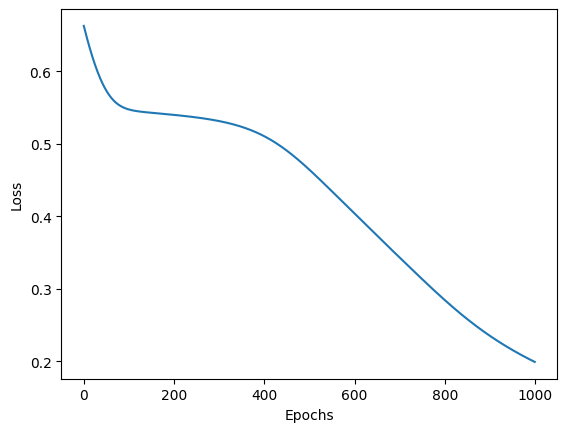

Training Losses are 
          0
0  0.744839
1  0.741297
2  0.737798
3  0.734343
4  0.730933
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3000   44]
 [ 288  668]]
Accuracy: 0.9170, Precision: 0.9382, Recall: 0.6987, F1-score: 0.8010

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2993   51]
 [ 276  680]]
Accuracy: 0.9183, Precision: 0.9302, Recall: 0.7113, F1-score: 0.8062



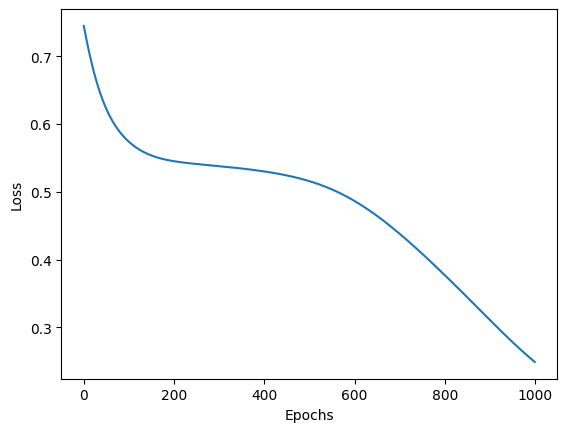

Training Losses are 
          0
0  0.554142
1  0.553684
2  0.553250
3  0.552841
4  0.552457
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2996   48]
 [  75  881]]
Accuracy: 0.9692, Precision: 0.9483, Recall: 0.9215, F1-score: 0.9347

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2987   57]
 [  82  874]]
Accuracy: 0.9653, Precision: 0.9388, Recall: 0.9142, F1-score: 0.9263



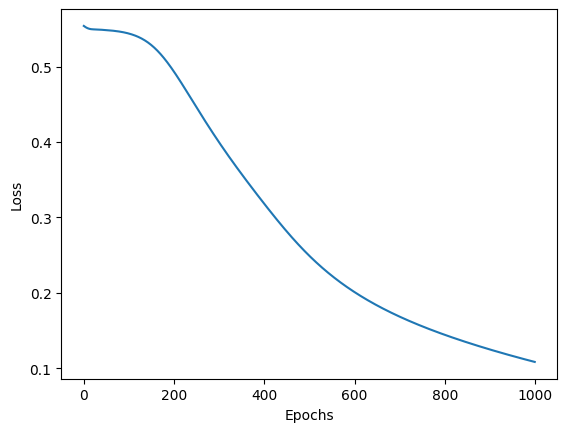

Training Losses are 
          0
0  0.653311
1  0.651286
2  0.649283
3  0.647301
4  0.645342
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2986   58]
 [ 174  782]]
Accuracy: 0.9420, Precision: 0.9310, Recall: 0.8180, F1-score: 0.8708

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2985   59]
 [ 163  793]]
Accuracy: 0.9445, Precision: 0.9308, Recall: 0.8295, F1-score: 0.8772



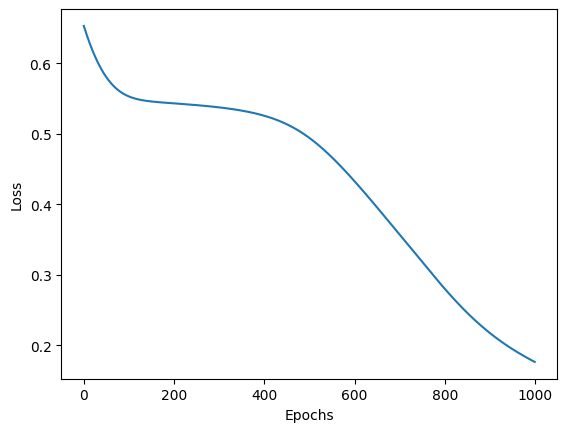

Training Losses are 
          0
0  0.894575
1  0.886484
2  0.878510
3  0.870656
4  0.862923
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2986   58]
 [ 487  469]]
Accuracy: 0.8638, Precision: 0.8899, Recall: 0.4906, F1-score: 0.6325

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2986   58]
 [ 482  474]]
Accuracy: 0.8650, Precision: 0.8910, Recall: 0.4958, F1-score: 0.6371



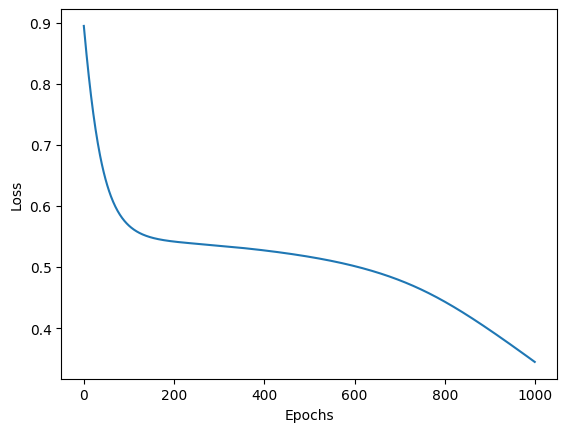

Training Losses are 
          0
0  0.607079
1  0.604318
2  0.601630
3  0.599017
4  0.596479
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2989   55]
 [  75  881]]
Accuracy: 0.9675, Precision: 0.9412, Recall: 0.9215, F1-score: 0.9313

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2984   60]
 [  76  880]]
Accuracy: 0.9660, Precision: 0.9362, Recall: 0.9205, F1-score: 0.9283



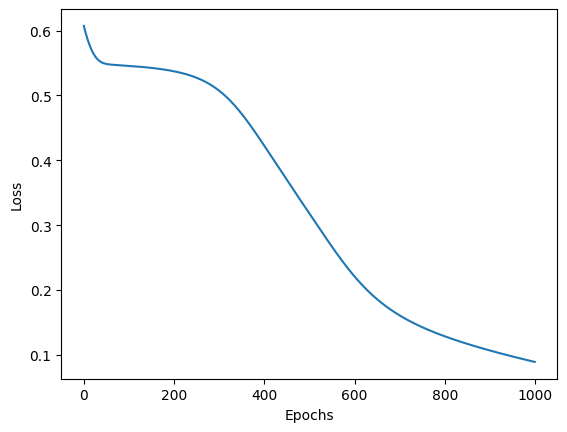

Training Losses are 
          0
0  0.715151
1  0.710825
2  0.706571
3  0.702391
4  0.698285
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2978   66]
 [ 169  787]]
Accuracy: 0.9413, Precision: 0.9226, Recall: 0.8232, F1-score: 0.8701

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2982   62]
 [ 161  795]]
Accuracy: 0.9443, Precision: 0.9277, Recall: 0.8316, F1-score: 0.8770



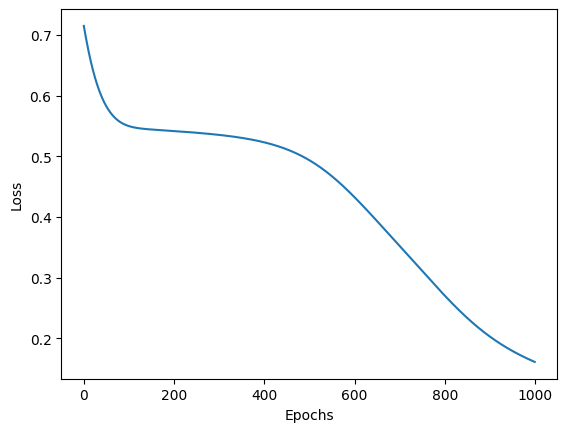

Training Losses are 
          0
0  0.714334
1  0.709123
2  0.703992
3  0.698943
4  0.693978
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2980   64]
 [ 147  809]]
Accuracy: 0.9473, Precision: 0.9267, Recall: 0.8462, F1-score: 0.8846

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2981   63]
 [ 150  806]]
Accuracy: 0.9467, Precision: 0.9275, Recall: 0.8431, F1-score: 0.8833



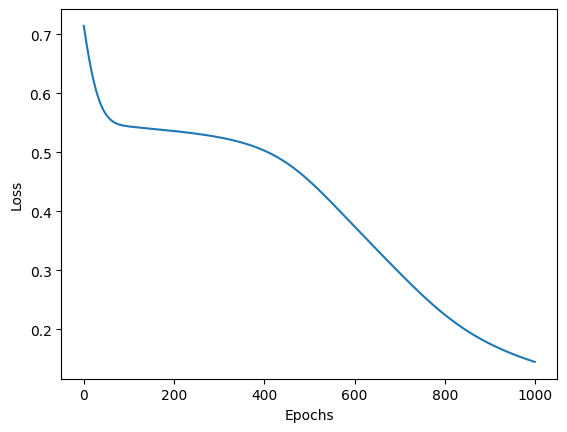

Training Losses are 
          0
0  0.745462
1  0.736642
2  0.728029
3  0.719625
4  0.711437
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2980   64]
 [ 149  807]]
Accuracy: 0.9467, Precision: 0.9265, Recall: 0.8441, F1-score: 0.8834

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2981   63]
 [ 149  807]]
Accuracy: 0.9470, Precision: 0.9276, Recall: 0.8441, F1-score: 0.8839



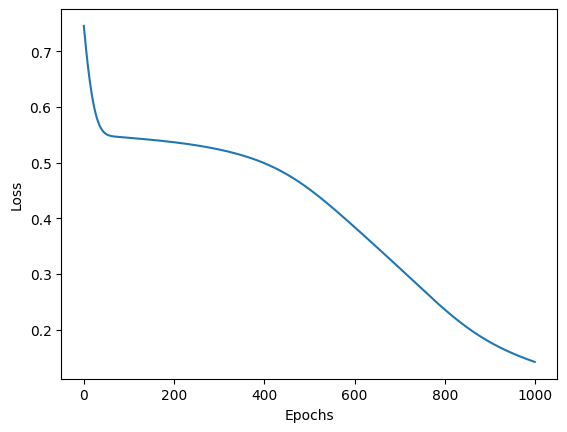

Training Losses are 
          0
0  0.653151
1  0.647152
2  0.641349
3  0.635745
4  0.630341
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2987   57]
 [  77  879]]
Accuracy: 0.9665, Precision: 0.9391, Recall: 0.9195, F1-score: 0.9292

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2985   59]
 [  78  878]]
Accuracy: 0.9657, Precision: 0.9370, Recall: 0.9184, F1-score: 0.9276



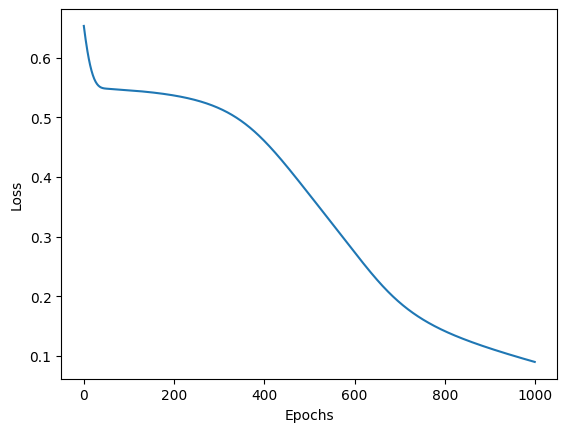

Training Losses are 
          0
0  0.702558
1  0.695312
2  0.688266
3  0.681422
4  0.674781
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2977   67]
 [ 115  841]]
Accuracy: 0.9545, Precision: 0.9262, Recall: 0.8797, F1-score: 0.9024

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2980   64]
 [ 121  835]]
Accuracy: 0.9537, Precision: 0.9288, Recall: 0.8734, F1-score: 0.9003



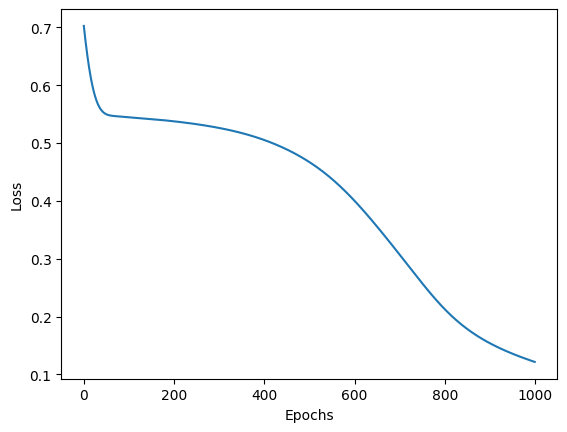

Training Losses are 
          0
0  0.647974
1  0.642052
2  0.636327
3  0.630803
4  0.625481
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2992   52]
 [  70  886]]
Accuracy: 0.9695, Precision: 0.9446, Recall: 0.9268, F1-score: 0.9356

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2984   60]
 [  66  890]]
Accuracy: 0.9685, Precision: 0.9368, Recall: 0.9310, F1-score: 0.9339



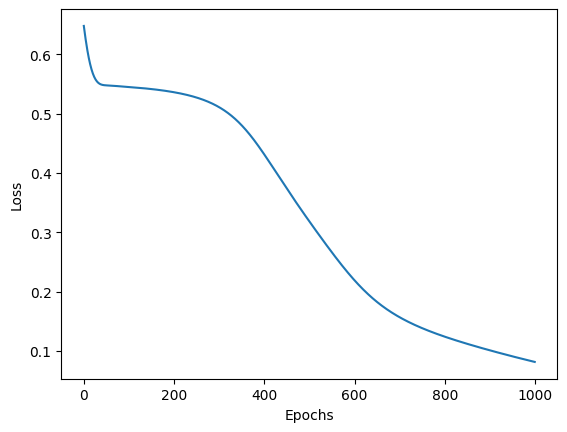

Training Losses are 
          0
0  0.663487
1  0.652719
2  0.642534
3  0.632936
4  0.623927
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3000   44]
 [  59  897]]
Accuracy: 0.9742, Precision: 0.9532, Recall: 0.9383, F1-score: 0.9457

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2995   49]
 [  53  903]]
Accuracy: 0.9745, Precision: 0.9485, Recall: 0.9446, F1-score: 0.9465



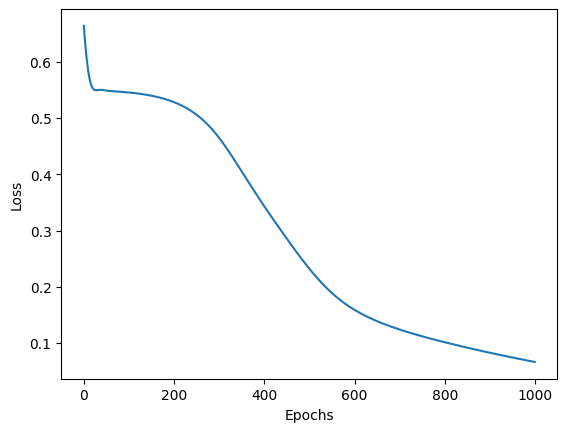

Training Losses are 
          0
0  0.718907
1  0.705056
2  0.691855
3  0.679310
4  0.667425
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3003   41]
 [  59  897]]
Accuracy: 0.9750, Precision: 0.9563, Recall: 0.9383, F1-score: 0.9472

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2996   48]
 [  53  903]]
Accuracy: 0.9748, Precision: 0.9495, Recall: 0.9446, F1-score: 0.9470



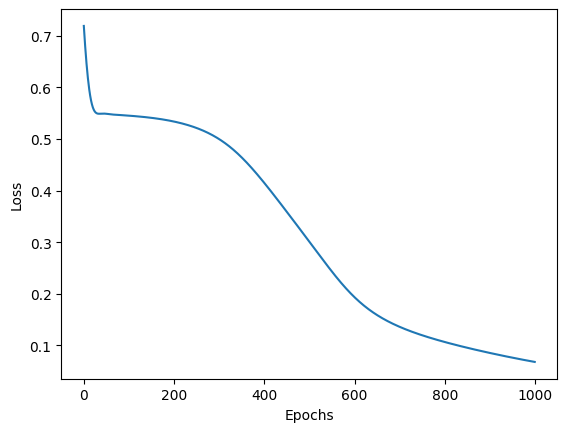

Training Losses are 
          0
0  0.591977
1  0.585602
2  0.579783
3  0.574525
4  0.569824
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3020   24]
 [  23  933]]
Accuracy: 0.9882, Precision: 0.9749, Recall: 0.9759, F1-score: 0.9754

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3027   17]
 [  22  934]]
Accuracy: 0.9902, Precision: 0.9821, Recall: 0.9770, F1-score: 0.9795



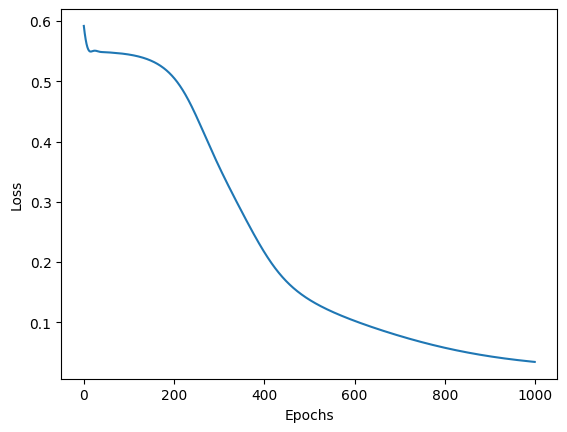

Training Losses are 
          0
0  0.630750
1  0.621546
2  0.612943
3  0.604946
4  0.597556
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3016   28]
 [  30  926]]
Accuracy: 0.9855, Precision: 0.9706, Recall: 0.9686, F1-score: 0.9696

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3019   25]
 [  33  923]]
Accuracy: 0.9855, Precision: 0.9736, Recall: 0.9655, F1-score: 0.9695



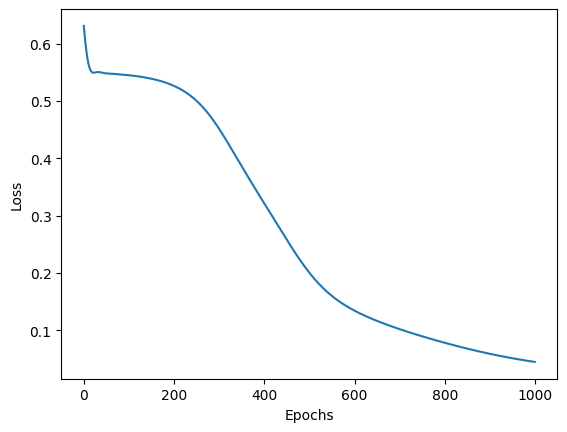

Training Losses are 
          0
0  0.615627
1  0.612992
2  0.610411
3  0.607886
4  0.605420
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2988   56]
 [  75  881]]
Accuracy: 0.9673, Precision: 0.9402, Recall: 0.9215, F1-score: 0.9308

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2984   60]
 [  79  877]]
Accuracy: 0.9653, Precision: 0.9360, Recall: 0.9174, F1-score: 0.9266



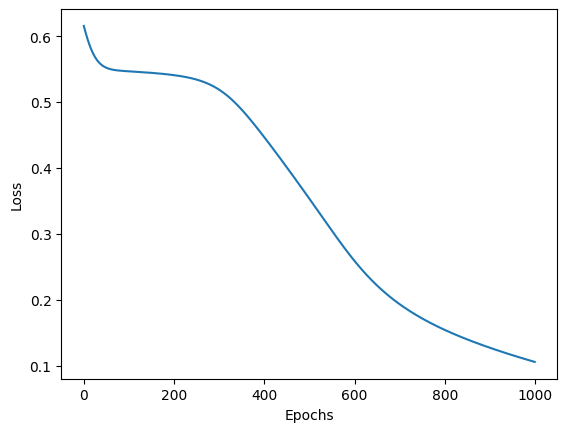

Training Losses are 
          0
0  0.706284
1  0.701866
2  0.697520
3  0.693247
4  0.689050
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2976   68]
 [ 154  802]]
Accuracy: 0.9445, Precision: 0.9218, Recall: 0.8389, F1-score: 0.8784

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2980   64]
 [ 150  806]]
Accuracy: 0.9465, Precision: 0.9264, Recall: 0.8431, F1-score: 0.8828



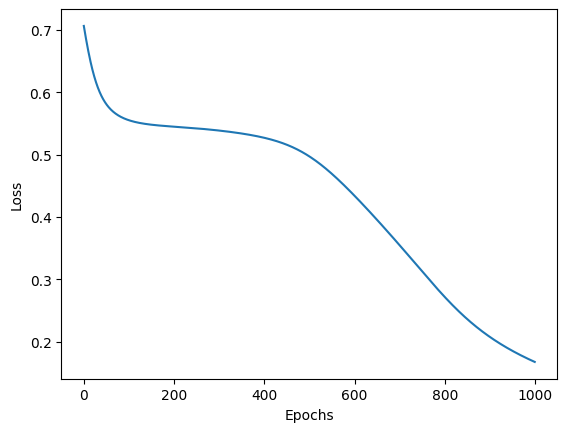

Training Losses are 
          0
0  0.632732
1  0.629900
2  0.627111
3  0.624369
4  0.621674
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2986   58]
 [  91  865]]
Accuracy: 0.9627, Precision: 0.9372, Recall: 0.9048, F1-score: 0.9207

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2982   62]
 [  94  862]]
Accuracy: 0.9610, Precision: 0.9329, Recall: 0.9017, F1-score: 0.9170



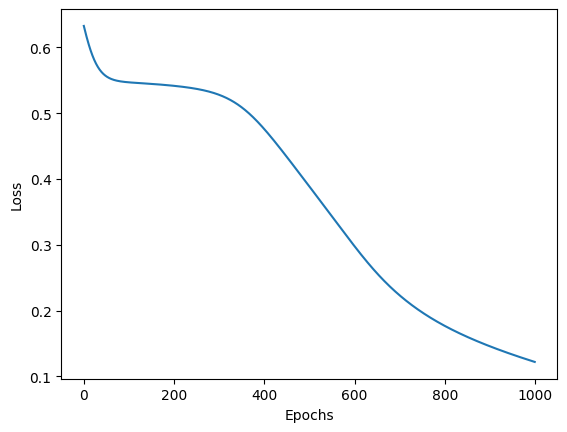

Training Losses are 
          0
0  0.725911
1  0.720302
2  0.714778
3  0.709345
4  0.704005
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2978   66]
 [ 166  790]]
Accuracy: 0.9420, Precision: 0.9229, Recall: 0.8264, F1-score: 0.8720

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2981   63]
 [ 157  799]]
Accuracy: 0.9450, Precision: 0.9269, Recall: 0.8358, F1-score: 0.8790



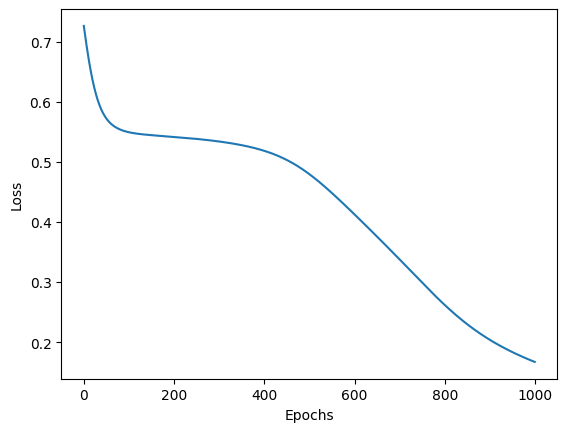

Training Losses are 
          0
0  0.695020
1  0.688350
2  0.681835
3  0.675481
4  0.669294
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2986   58]
 [  78  878]]
Accuracy: 0.9660, Precision: 0.9380, Recall: 0.9184, F1-score: 0.9281

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2982   62]
 [  79  877]]
Accuracy: 0.9647, Precision: 0.9340, Recall: 0.9174, F1-score: 0.9256



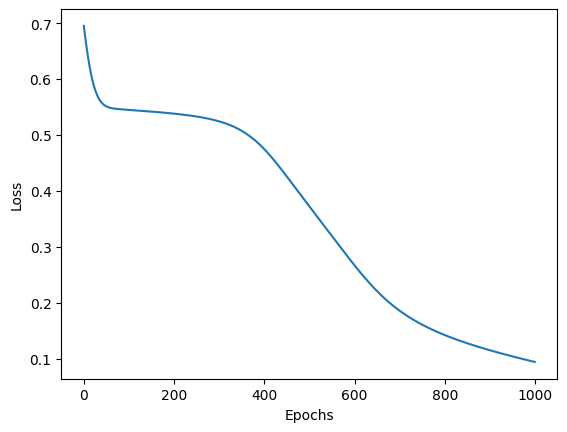

Training Losses are 
          0
0  0.619247
1  0.615710
2  0.612268
3  0.608925
4  0.605683
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3010   34]
 [  39  917]]
Accuracy: 0.9818, Precision: 0.9642, Recall: 0.9592, F1-score: 0.9617

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3003   41]
 [  45  911]]
Accuracy: 0.9785, Precision: 0.9569, Recall: 0.9529, F1-score: 0.9549



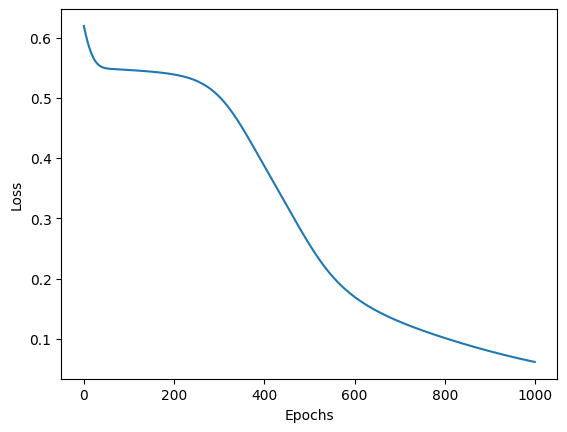

Training Losses are 
          0
0  0.754699
1  0.747061
2  0.739591
3  0.732291
4  0.725163
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2980   64]
 [  99  857]]
Accuracy: 0.9593, Precision: 0.9305, Recall: 0.8964, F1-score: 0.9132

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2980   64]
 [ 109  847]]
Accuracy: 0.9567, Precision: 0.9297, Recall: 0.8860, F1-score: 0.9073



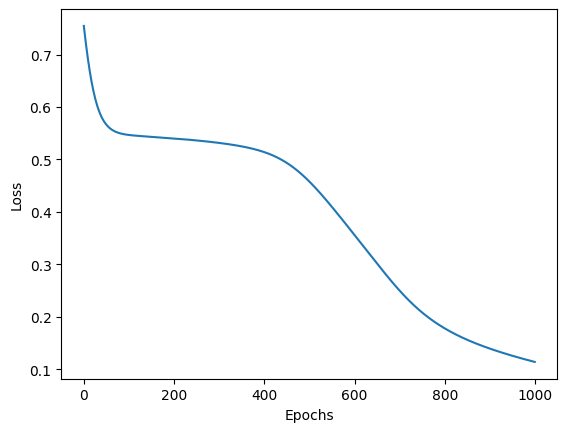

Training Losses are 
          0
0  0.644173
1  0.639221
2  0.634410
3  0.629743
4  0.625223
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3000   44]
 [  59  897]]
Accuracy: 0.9742, Precision: 0.9532, Recall: 0.9383, F1-score: 0.9457

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2996   48]
 [  52  904]]
Accuracy: 0.9750, Precision: 0.9496, Recall: 0.9456, F1-score: 0.9476



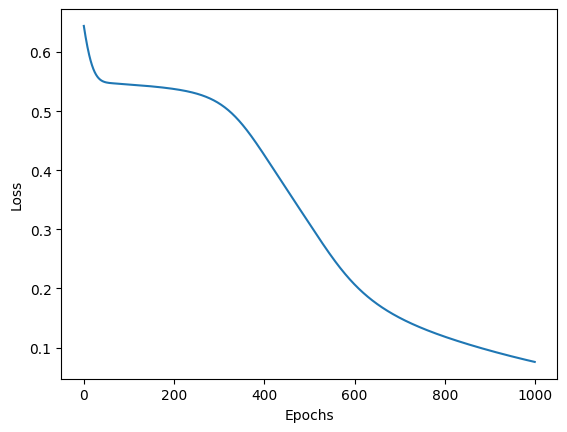

Training Losses are 
          0
0  0.681648
1  0.671232
2  0.661297
3  0.651851
4  0.642898
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3009   35]
 [  46  910]]
Accuracy: 0.9798, Precision: 0.9630, Recall: 0.9519, F1-score: 0.9574

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3002   42]
 [  50  906]]
Accuracy: 0.9770, Precision: 0.9557, Recall: 0.9477, F1-score: 0.9517



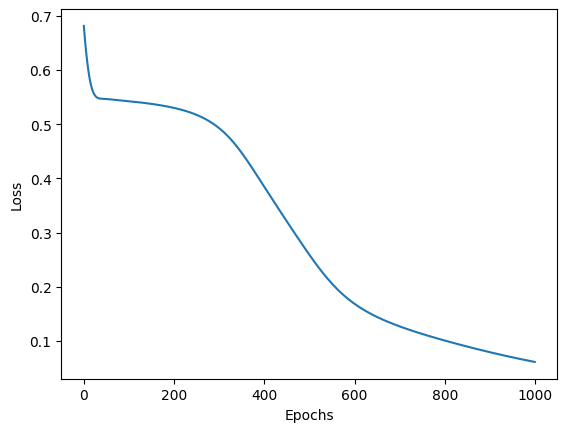

Training Losses are 
          0
0  0.640404
1  0.632203
2  0.624428
3  0.617084
4  0.610174
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3015   29]
 [  30  926]]
Accuracy: 0.9852, Precision: 0.9696, Recall: 0.9686, F1-score: 0.9691

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3018   26]
 [  35  921]]
Accuracy: 0.9848, Precision: 0.9725, Recall: 0.9634, F1-score: 0.9679



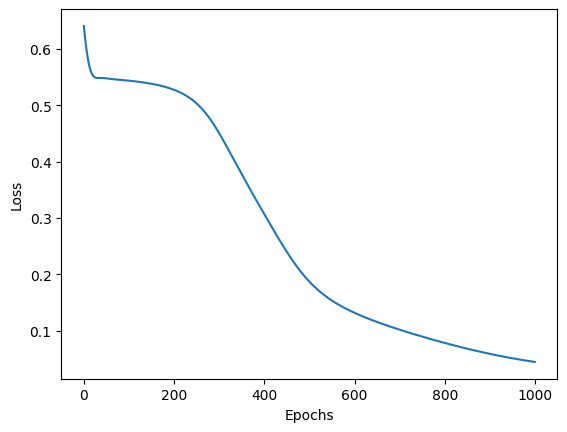

Training Losses are 
          0
0  0.617995
1  0.611190
2  0.604771
3  0.598741
4  0.593105
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3019   25]
 [  24  932]]
Accuracy: 0.9878, Precision: 0.9739, Recall: 0.9749, F1-score: 0.9744

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3023   21]
 [  26  930]]
Accuracy: 0.9882, Precision: 0.9779, Recall: 0.9728, F1-score: 0.9754



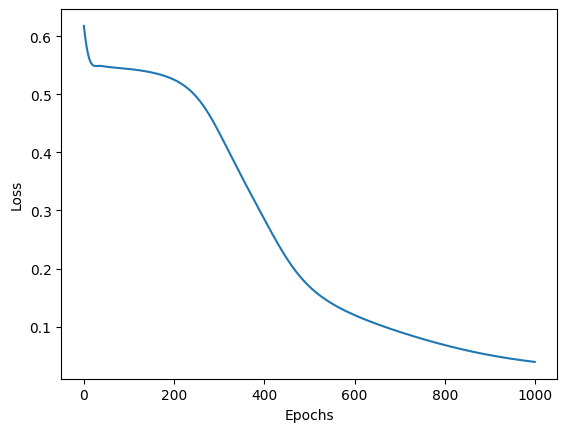

Training Losses are 
          0
0  0.650388
1  0.643765
2  0.637380
3  0.631238
4  0.625345
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3015   29]
 [  28  928]]
Accuracy: 0.9858, Precision: 0.9697, Recall: 0.9707, F1-score: 0.9702

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3019   25]
 [  32  924]]
Accuracy: 0.9858, Precision: 0.9737, Recall: 0.9665, F1-score: 0.9701



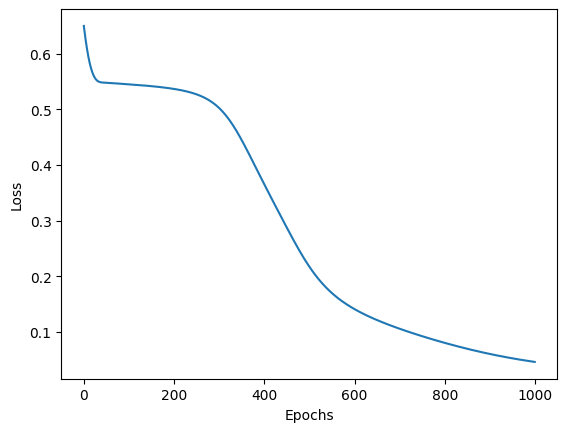

Training Losses are 
          0
0  0.736729
1  0.718587
2  0.701458
3  0.685358
4  0.670296
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3017   27]
 [  27  929]]
Accuracy: 0.9865, Precision: 0.9718, Recall: 0.9718, F1-score: 0.9718

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3020   24]
 [  32  924]]
Accuracy: 0.9860, Precision: 0.9747, Recall: 0.9665, F1-score: 0.9706



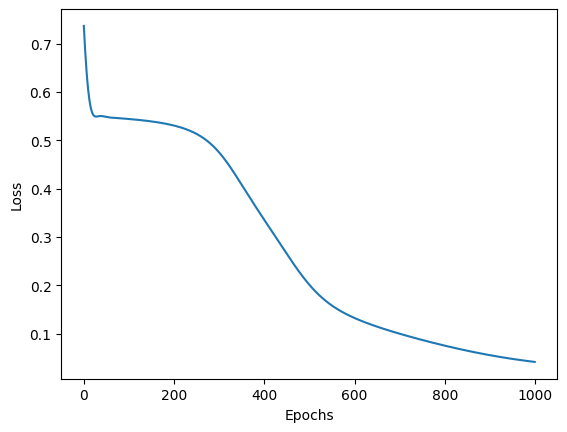

Training Losses are 
          0
0  0.659235
1  0.645946
2  0.633583
3  0.622158
4  0.611675
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3021   23]
 [  16  940]]
Accuracy: 0.9902, Precision: 0.9761, Recall: 0.9833, F1-score: 0.9797

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3029   15]
 [  19  937]]
Accuracy: 0.9915, Precision: 0.9842, Recall: 0.9801, F1-score: 0.9822



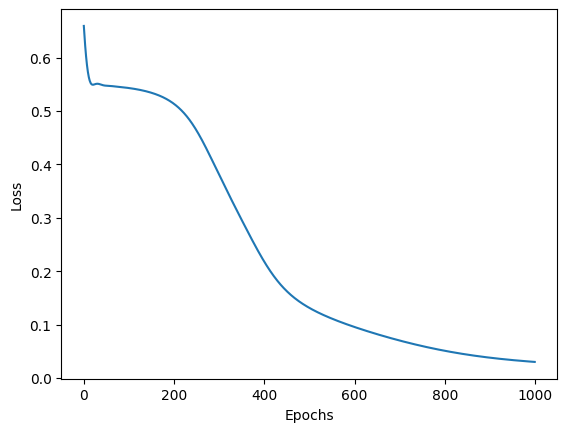

Training Losses are 
          0
0  0.854487
1  0.828901
2  0.804524
3  0.781384
4  0.759497
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3010   34]
 [  42  914]]
Accuracy: 0.9810, Precision: 0.9641, Recall: 0.9561, F1-score: 0.9601

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3004   40]
 [  47  909]]
Accuracy: 0.9782, Precision: 0.9579, Recall: 0.9508, F1-score: 0.9543



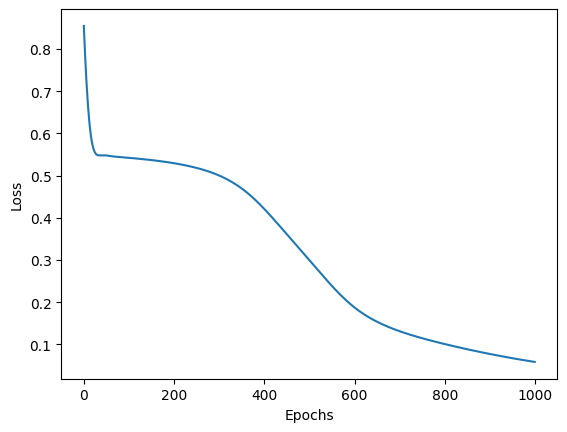

Training Losses are 
          0
0  0.576460
1  0.570090
2  0.564647
3  0.560123
4  0.556493
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3031   13]
 [  10  946]]
Accuracy: 0.9942, Precision: 0.9864, Recall: 0.9895, F1-score: 0.9880

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3031   13]
 [  11  945]]
Accuracy: 0.9940, Precision: 0.9864, Recall: 0.9885, F1-score: 0.9875



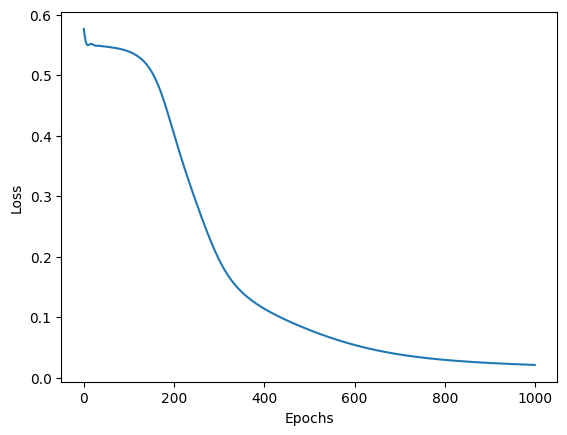

The best accuracy on test data is 0.994 for layers 64 , 64, 64


In [19]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(21,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

Training Losses are 
          0
0  0.628882
1  0.627730
2  0.626595
3  0.625478
4  0.624378
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


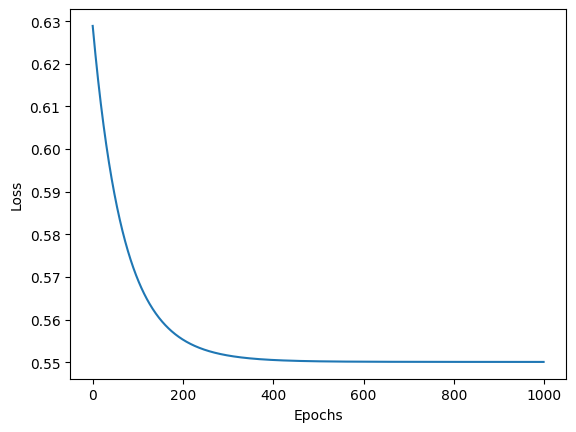

Training Losses are 
          0
0  0.760805
1  0.757509
2  0.754268
3  0.751079
4  0.747942
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


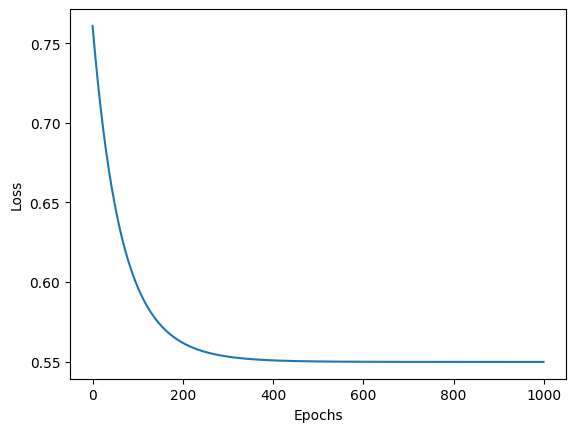

Training Losses are 
          0
0  0.638470
1  0.637314
2  0.636174
3  0.635050
4  0.633941
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


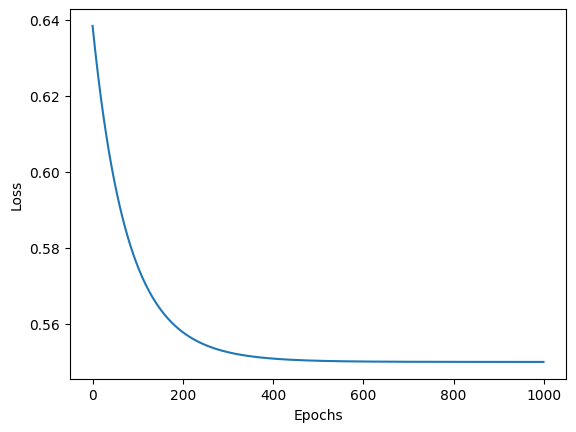

Training Losses are 
          0
0  0.933532
1  0.928193
2  0.922924
3  0.917726
4  0.912598
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


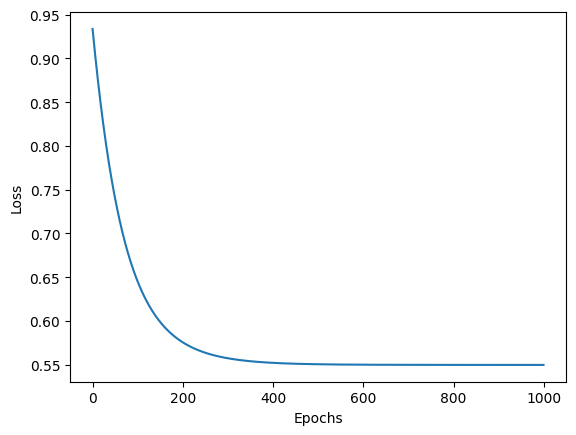

Training Losses are 
          0
0  0.801481
1  0.795702
2  0.790057
3  0.784544
4  0.779160
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


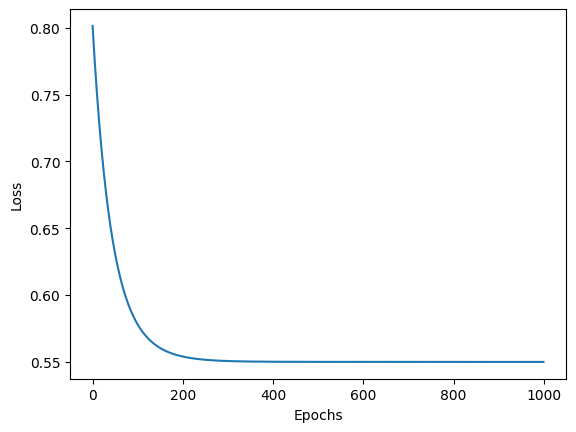

Training Losses are 
          0
0  0.645543
1  0.643434
2  0.641373
3  0.639362
4  0.637397
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


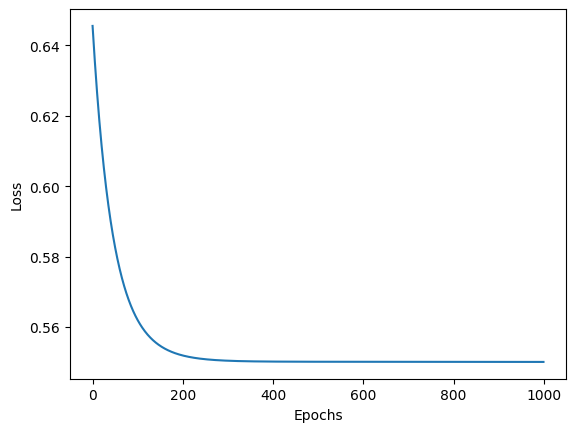

Training Losses are 
          0
0  0.730420
1  0.726470
2  0.722609
3  0.718836
4  0.715148
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


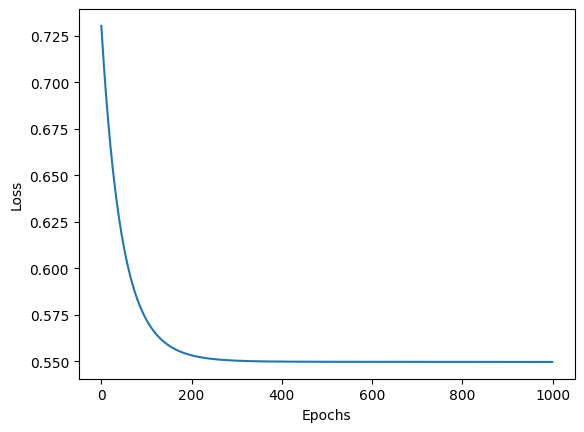

Training Losses are 
          0
0  0.637082
1  0.634939
2  0.632851
3  0.630818
4  0.628838
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


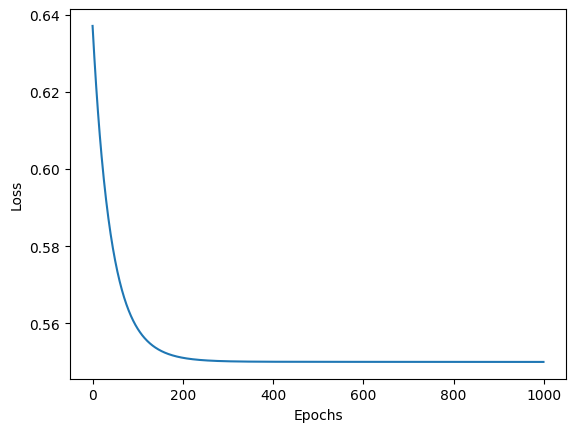

Training Losses are 
          0
0  0.799611
1  0.788755
2  0.778375
3  0.768452
4  0.758967
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


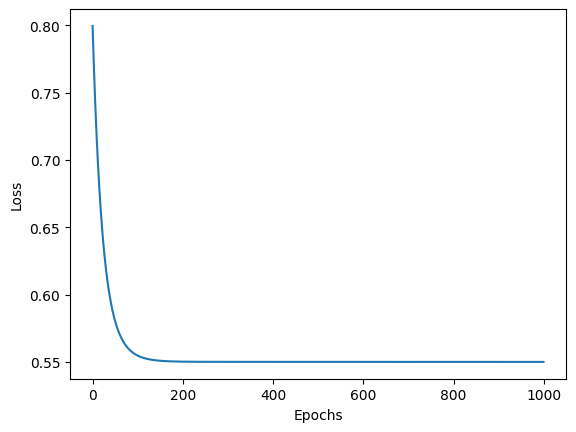

Training Losses are 
          0
0  0.705982
1  0.698587
2  0.691559
3  0.684879
4  0.678531
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


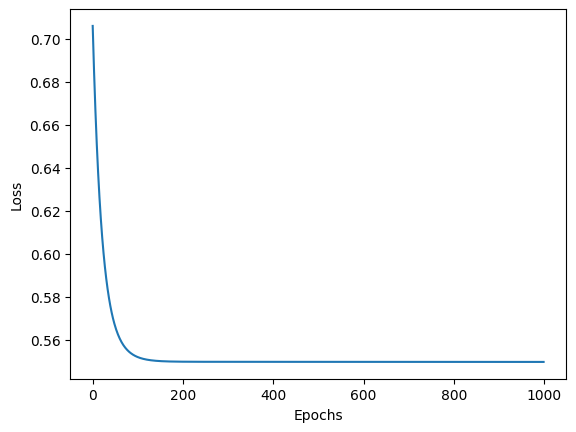

Training Losses are 
          0
0  0.741316
1  0.732659
2  0.724407
3  0.716543
4  0.709048
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


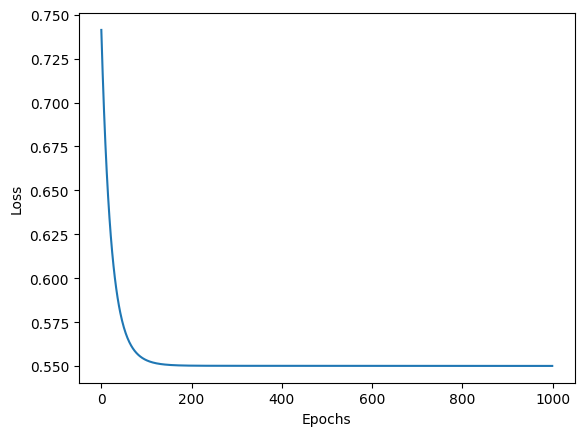

Training Losses are 
          0
0  0.625492
1  0.622308
2  0.619268
3  0.616364
4  0.613590
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


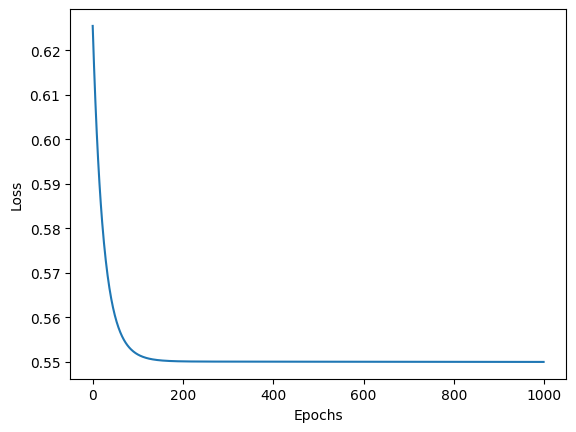

Training Losses are 
          0
0  0.682663
1  0.672108
2  0.662436
3  0.653573
4  0.645448
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


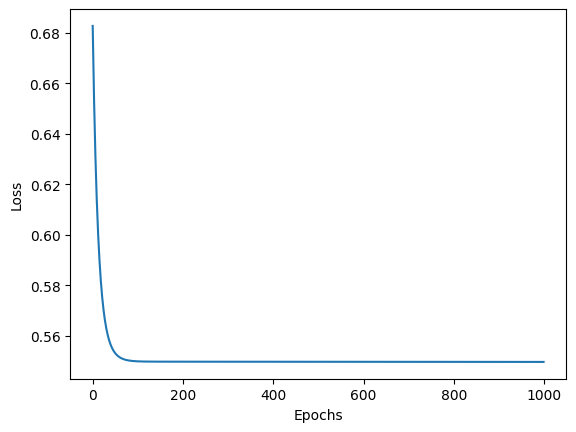

Training Losses are 
          0
0  0.698316
1  0.685671
2  0.674156
3  0.663668
4  0.654114
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


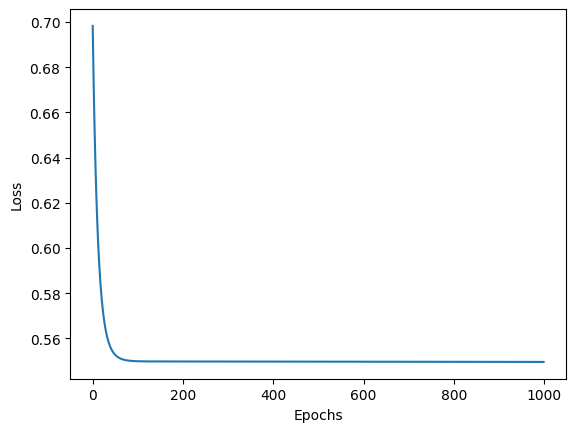

Training Losses are 
          0
0  0.720279
1  0.706609
2  0.694082
3  0.682603
4  0.672085
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


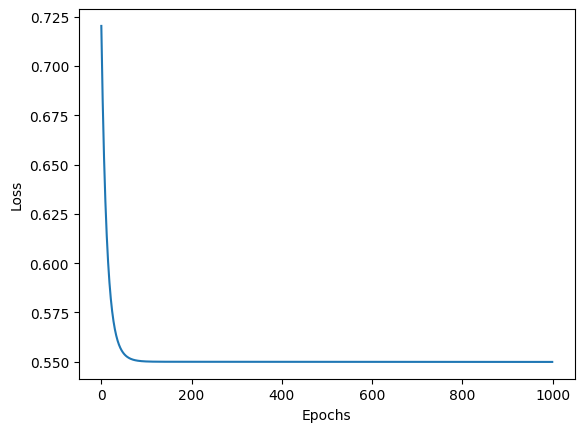

Training Losses are 
          0
0  0.649241
1  0.641231
2  0.633910
3  0.627215
4  0.621090
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


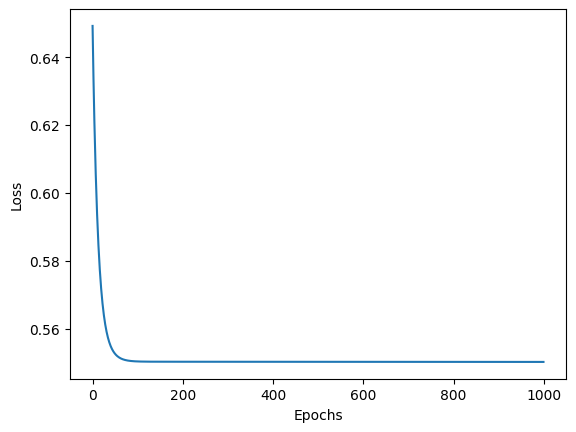

Training Losses are 
          0
0  0.580263
1  0.579842
2  0.579428
3  0.579019
4  0.578617
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


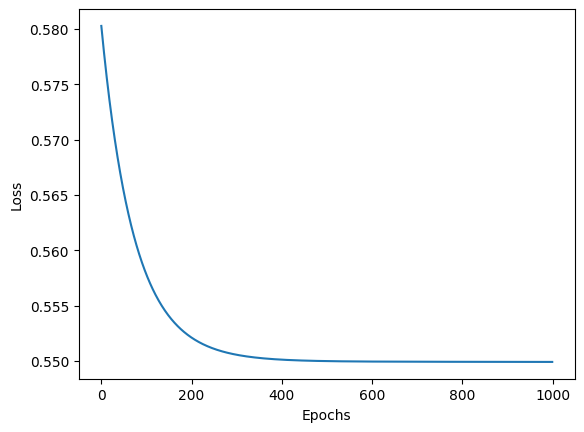

Training Losses are 
          0
0  0.700885
1  0.698744
2  0.696633
3  0.694554
4  0.692505
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


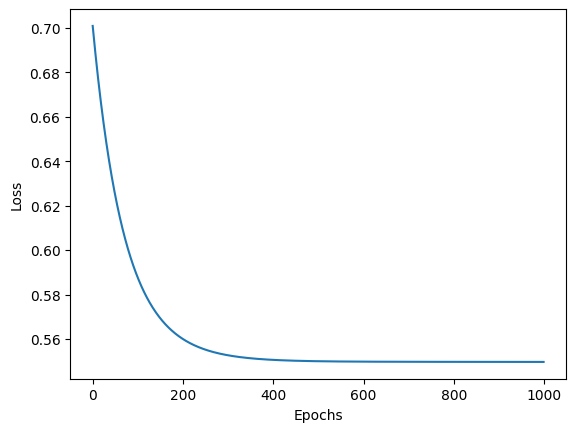

Training Losses are 
          0
0  0.709787
1  0.707202
2  0.704660
3  0.702160
4  0.699703
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


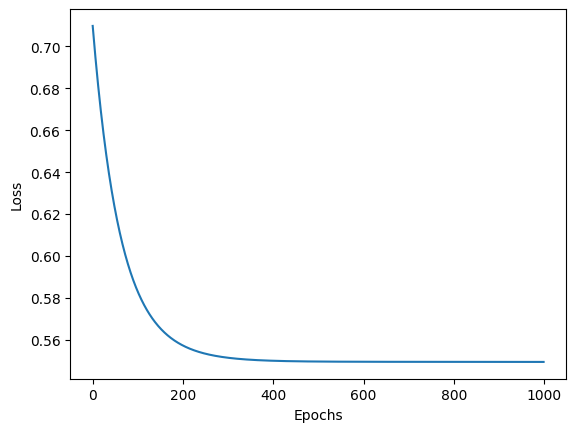

Training Losses are 
          0
0  0.686114
1  0.684315
2  0.682542
3  0.680793
4  0.679069
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


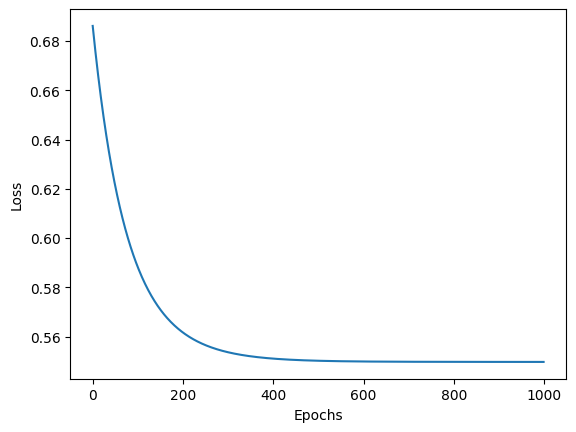

Training Losses are 
          0
0  0.605622
1  0.604295
2  0.603001
3  0.601740
4  0.600510
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


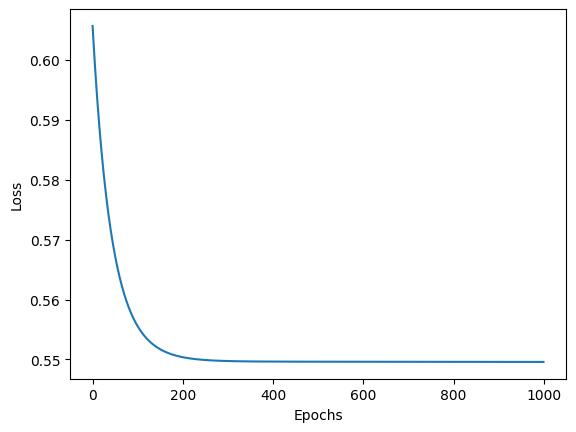

Training Losses are 
          0
0  0.742854
1  0.737877
2  0.733031
3  0.728316
4  0.723725
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


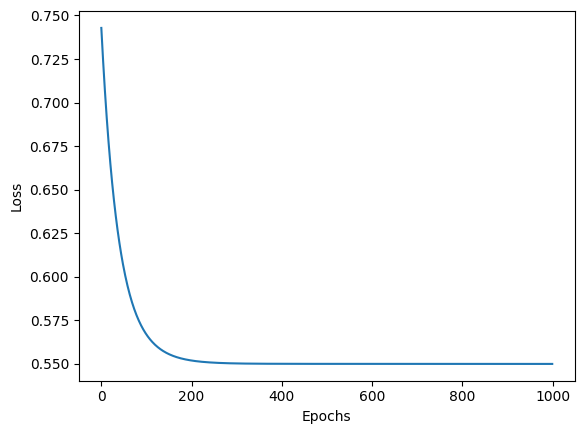

Training Losses are 
          0
0  0.594147
1  0.593025
2  0.591932
3  0.590870
4  0.589836
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


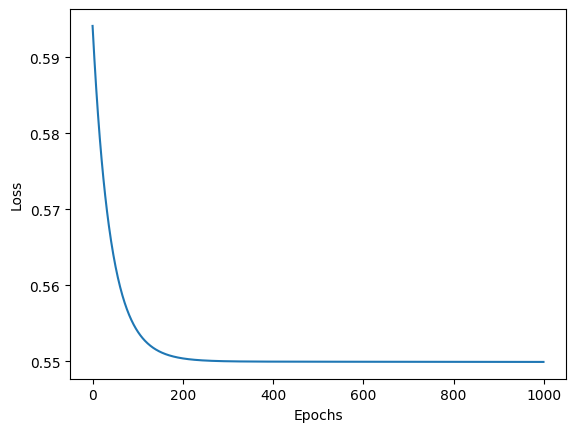

Training Losses are 
          0
0  0.846041
1  0.838350
2  0.830857
3  0.823559
4  0.816452
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


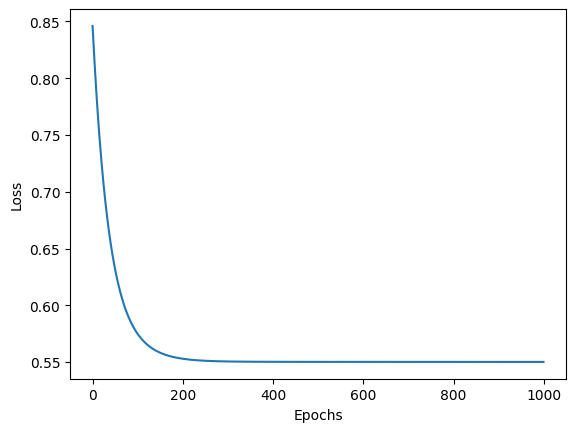

Training Losses are 
          0
0  0.650089
1  0.646125
2  0.642328
3  0.638691
4  0.635205
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


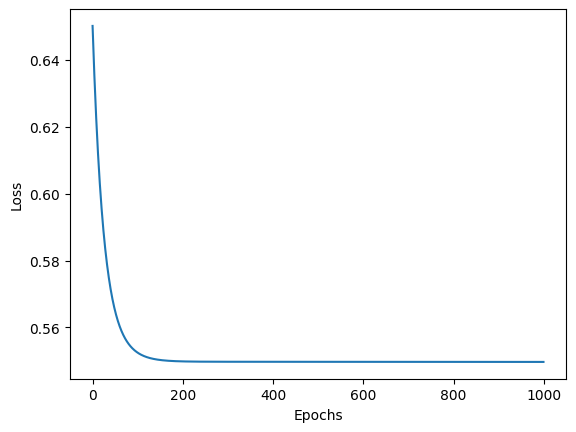

Training Losses are 
          0
0  0.701208
1  0.694535
2  0.688171
3  0.682102
4  0.676313
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


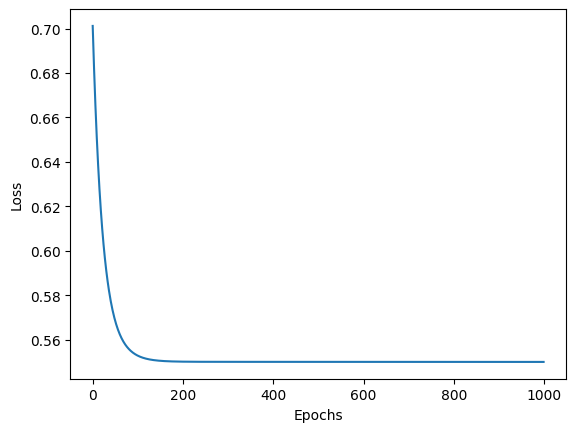

Training Losses are 
          0
0  0.728455
1  0.720203
2  0.712345
3  0.704865
4  0.697743
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


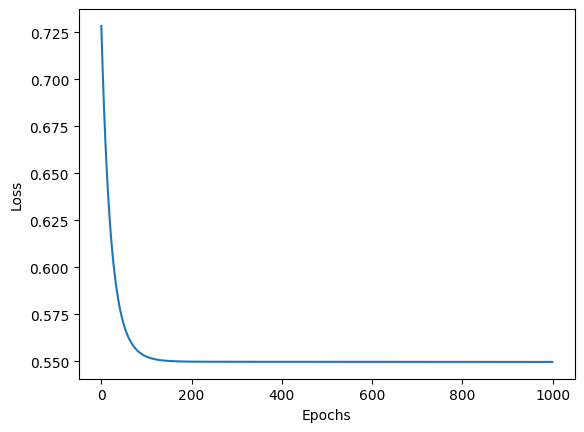

Training Losses are 
          0
0  0.755064
1  0.746952
2  0.739170
3  0.731705
4  0.724544
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


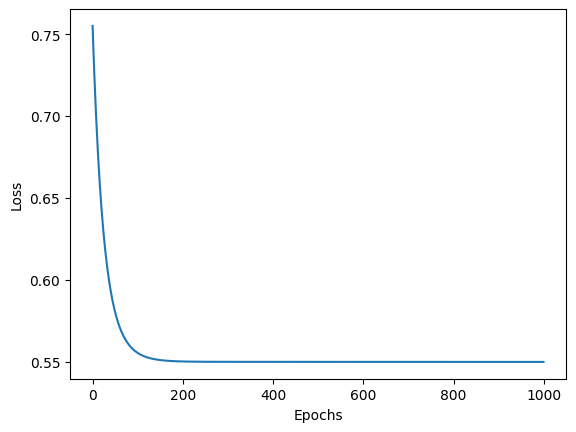

Training Losses are 
          0
0  0.728278
1  0.714554
2  0.701927
3  0.690311
4  0.679625
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


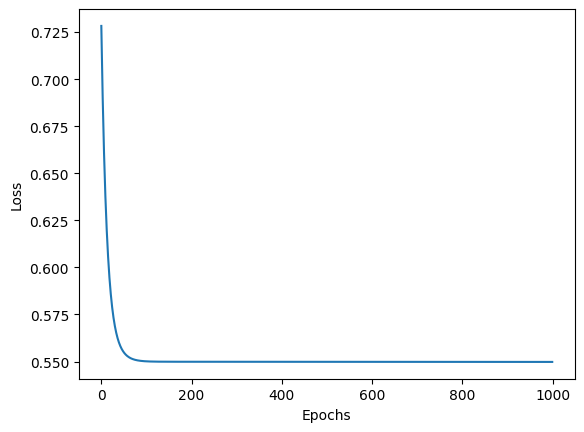

Training Losses are 
          0
0  0.622170
1  0.616570
2  0.611434
3  0.606720
4  0.602392
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


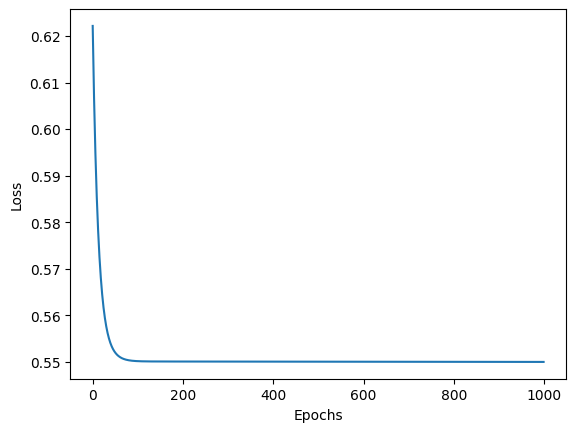

Training Losses are 
          0
0  0.620645
1  0.615219
2  0.610239
3  0.605665
4  0.601462
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


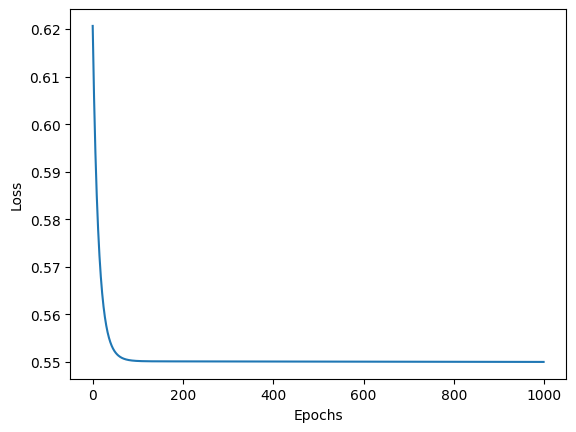

Training Losses are 
          0
0  0.800957
1  0.779288
2  0.759506
3  0.741458
4  0.725004
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


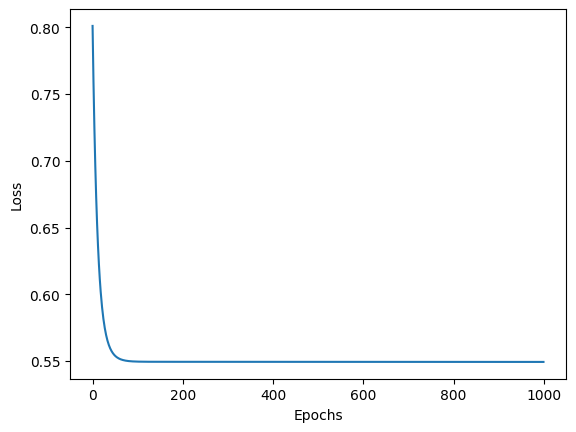

Training Losses are 
          0
0  0.574711
1  0.574355
2  0.574004
3  0.573658
4  0.573318
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


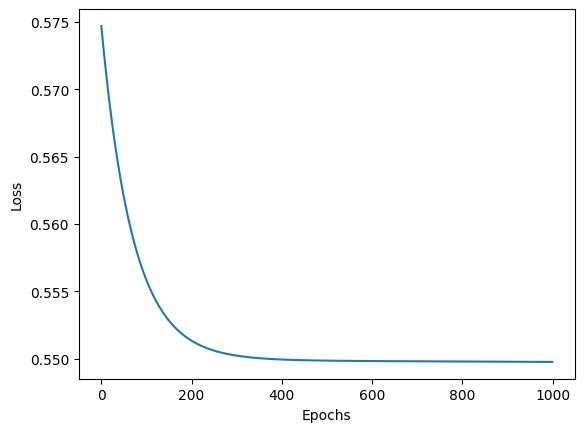

Training Losses are 
          0
0  0.697421
1  0.695108
2  0.692834
3  0.690600
4  0.688403
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


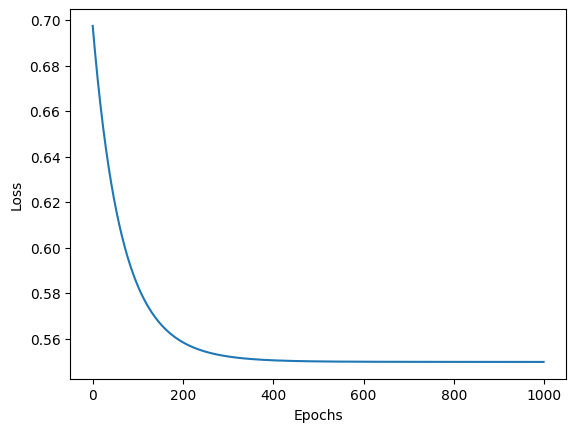

Training Losses are 
          0
0  0.679765
1  0.677804
2  0.675874
3  0.673976
4  0.672107
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


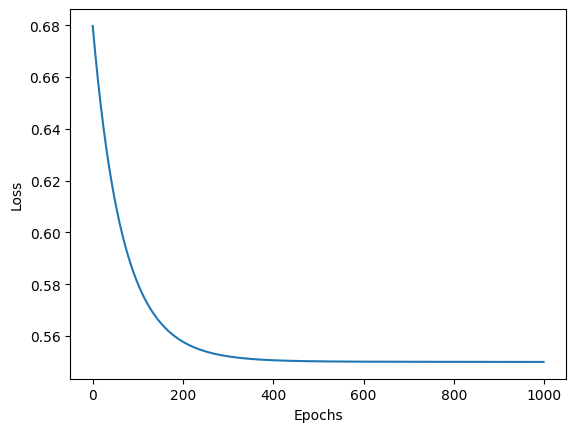

Training Losses are 
          0
0  0.683267
1  0.681164
2  0.679096
3  0.677061
4  0.675060
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


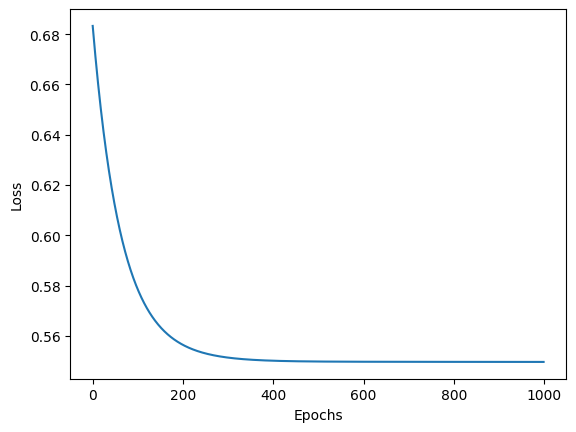

Training Losses are 
          0
0  0.796538
1  0.789782
2  0.783212
3  0.776825
4  0.770615
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


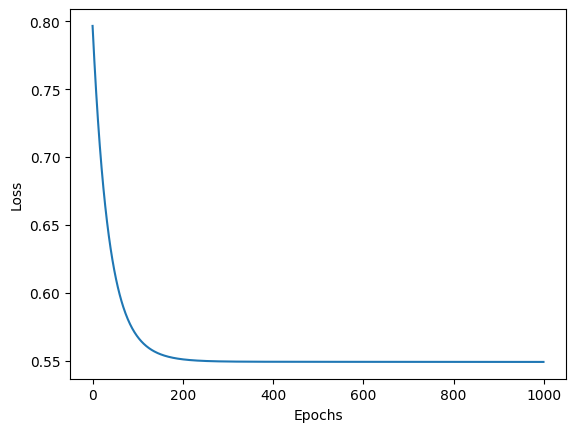

Training Losses are 
          0
0  0.636565
1  0.634267
2  0.632034
3  0.629864
4  0.627755
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


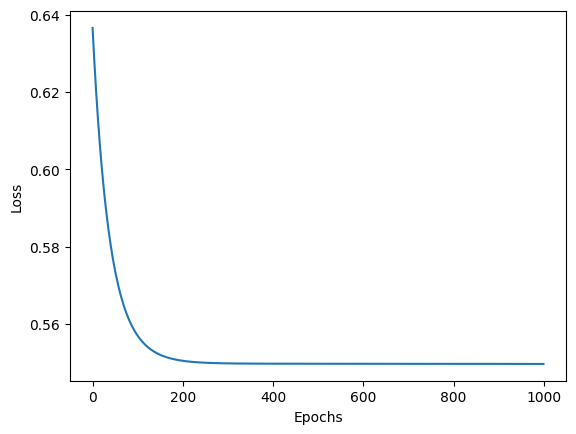

Training Losses are 
          0
0  0.745952
1  0.741164
2  0.736497
3  0.731950
4  0.727518
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


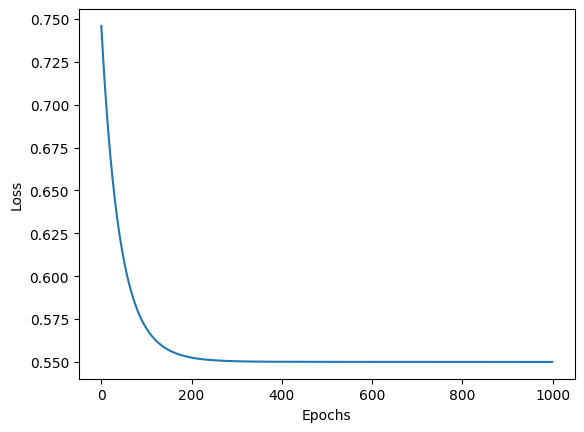

Training Losses are 
          0
0  0.617267
1  0.615729
2  0.614228
3  0.612763
4  0.611333
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


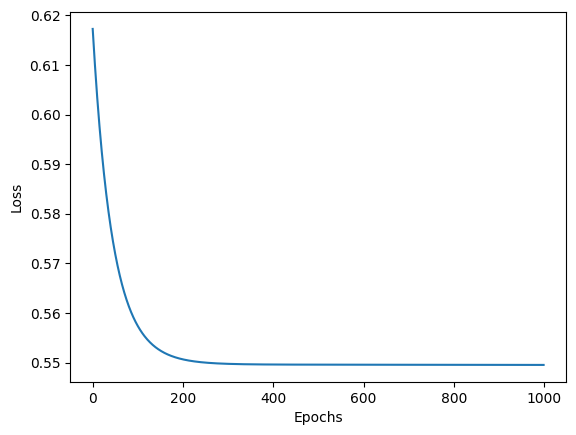

Training Losses are 
          0
0  0.690815
1  0.685084
2  0.679598
3  0.674347
4  0.669320
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


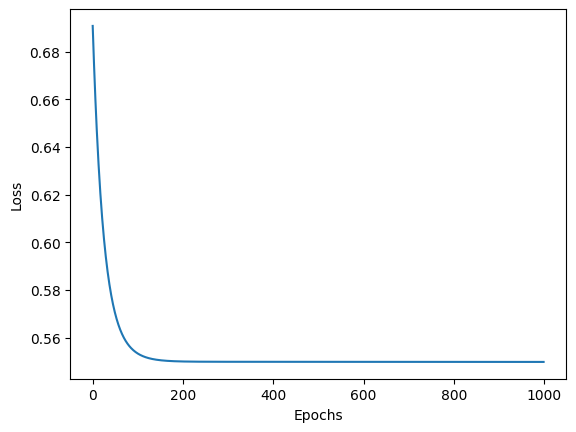

Training Losses are 
          0
0  0.748252
1  0.739358
2  0.730878
3  0.722792
4  0.715083
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


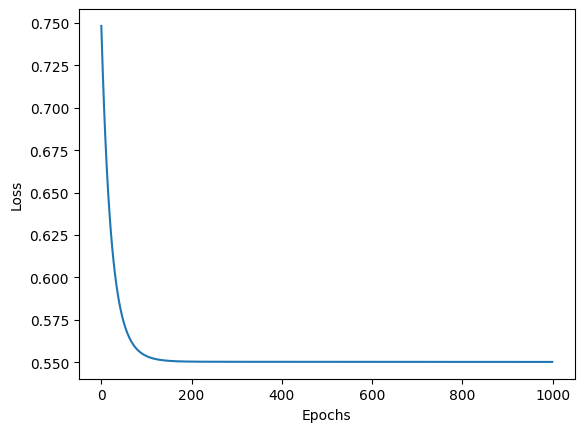

Training Losses are 
          0
0  0.690501
1  0.684610
2  0.678979
3  0.673595
4  0.668447
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


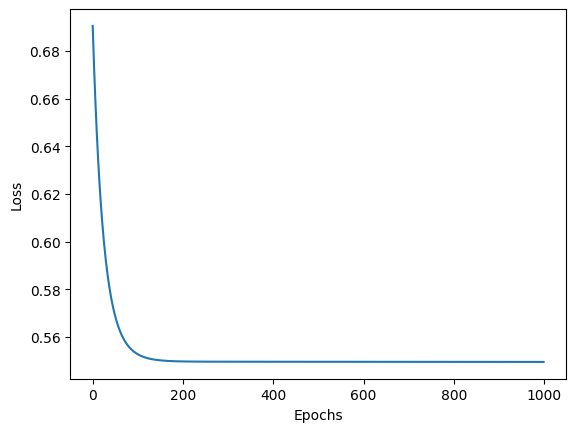

Training Losses are 
          0
0  0.599252
1  0.597175
2  0.595190
3  0.593294
4  0.591483
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


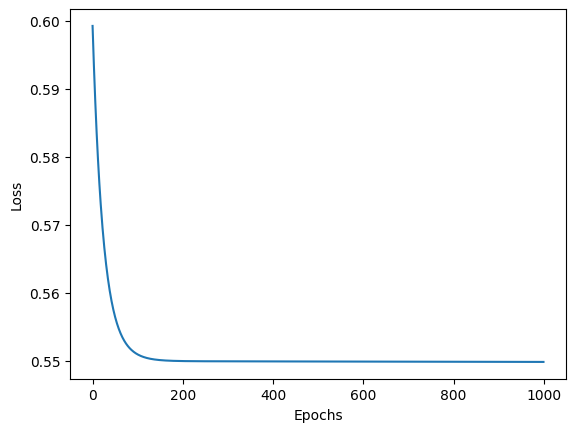

Training Losses are 
          0
0  0.642369
1  0.635376
2  0.628946
3  0.623031
4  0.617589
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


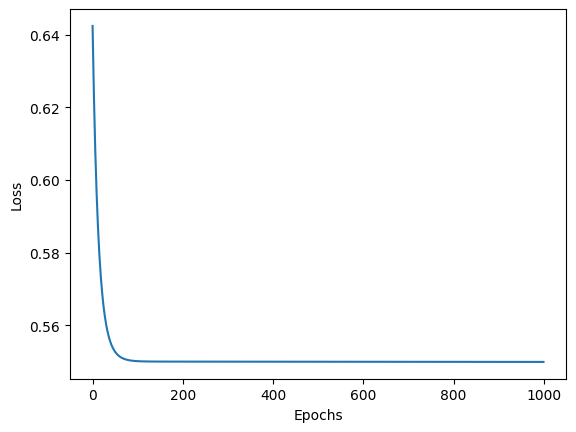

Training Losses are 
          0
0  0.580092
1  0.578001
2  0.576065
3  0.574273
4  0.572612
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


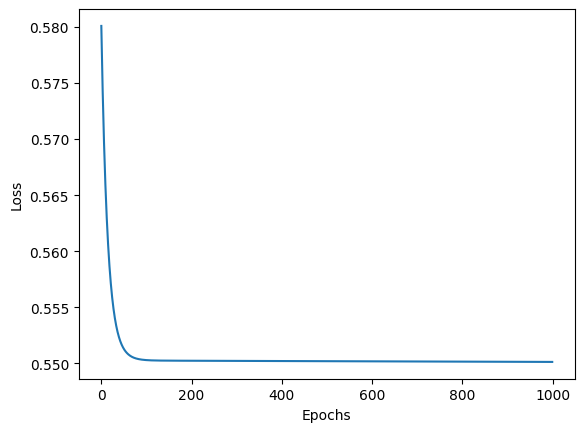

Training Losses are 
          0
0  0.570433
1  0.568798
2  0.567297
3  0.565918
4  0.564650
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


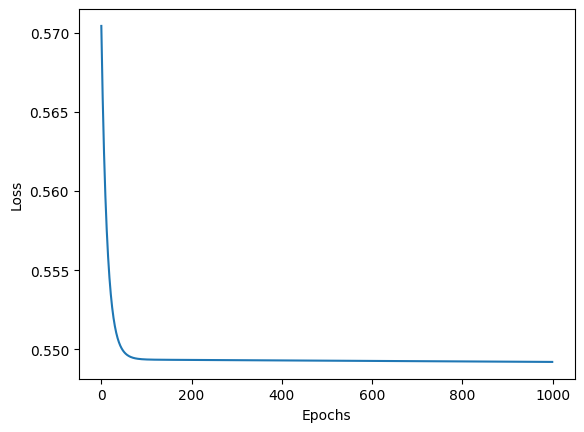

Training Losses are 
          0
0  0.677993
1  0.667436
2  0.657797
3  0.648996
4  0.640957
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


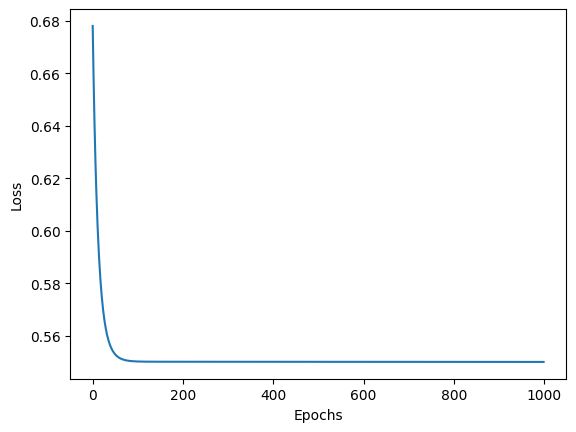

Training Losses are 
          0
0  0.566292
1  0.566055
2  0.565822
3  0.565592
4  0.565366
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


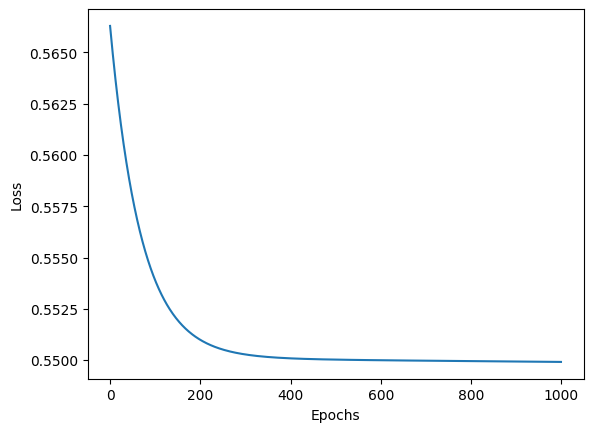

Training Losses are 
          0
0  0.729287
1  0.726416
2  0.723593
3  0.720816
4  0.718085
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


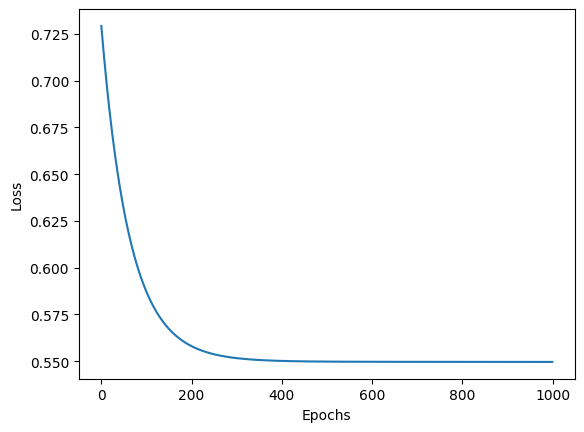

Training Losses are 
          0
0  0.741440
1  0.738338
2  0.735293
3  0.732303
4  0.729366
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


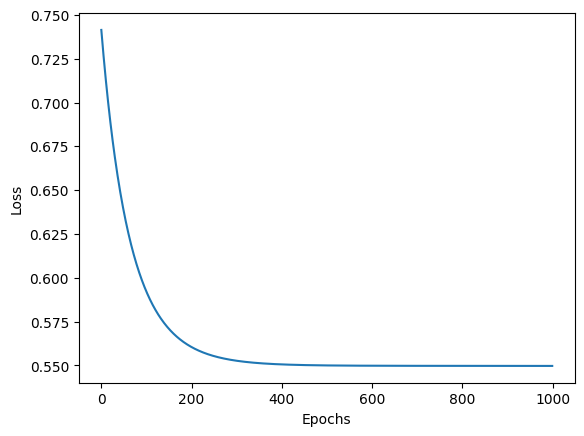

Training Losses are 
          0
0  0.743729
1  0.740768
2  0.737853
3  0.734983
4  0.732157
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


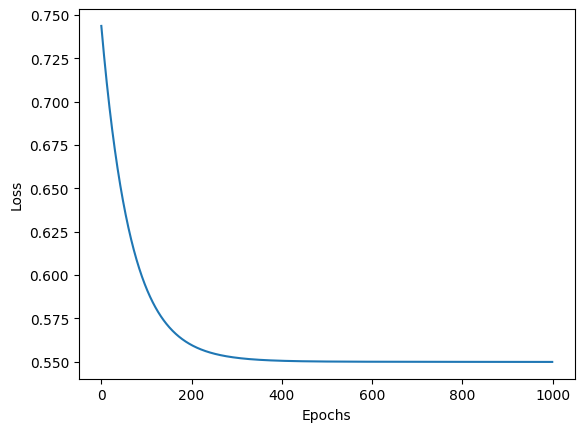

Training Losses are 
          0
0  0.671393
1  0.668405
2  0.665496
3  0.662663
4  0.659905
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


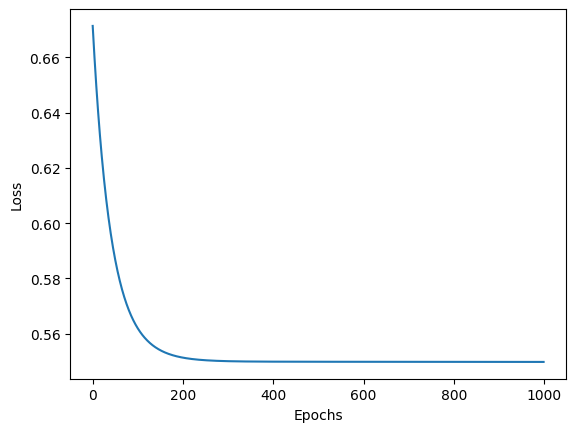

Training Losses are 
          0
0  0.644224
1  0.641896
2  0.639627
3  0.637417
4  0.635264
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


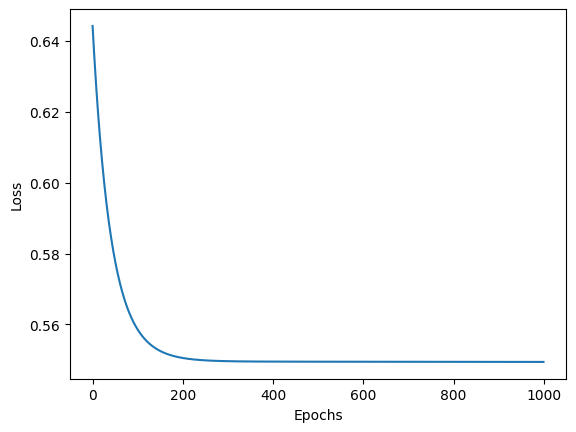

Training Losses are 
          0
0  0.652075
1  0.649419
2  0.646838
3  0.644327
4  0.641886
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


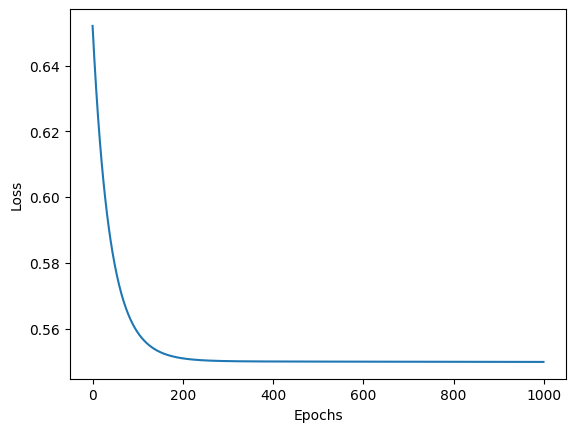

Training Losses are 
          0
0  0.615345
1  0.613671
2  0.612042
3  0.610458
4  0.608916
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


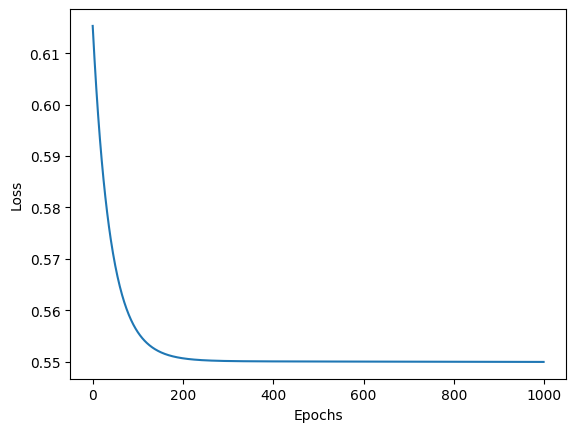

Training Losses are 
          0
0  0.773881
1  0.764405
2  0.755341
3  0.746673
4  0.738383
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


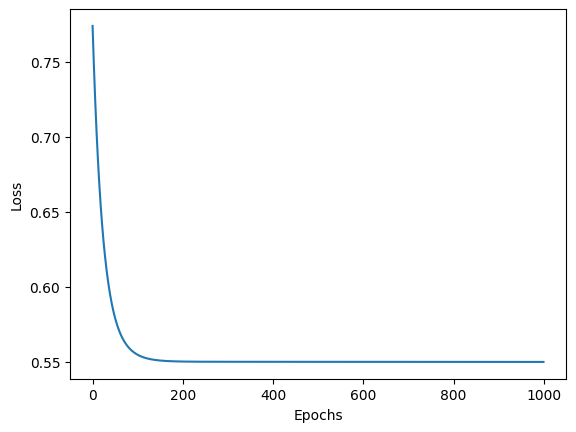

Training Losses are 
          0
0  0.773669
1  0.764058
2  0.754869
3  0.746083
4  0.737684
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


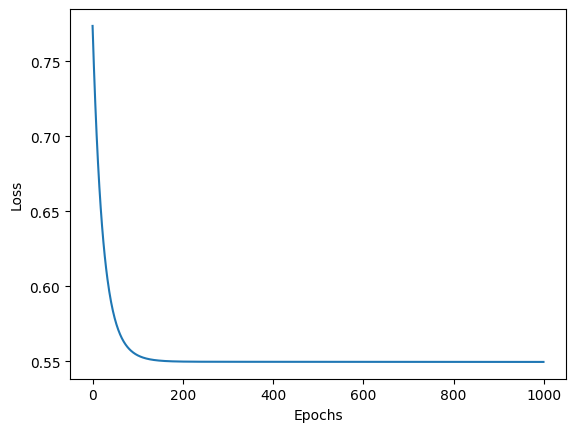

Training Losses are 
          0
0  0.639350
1  0.635680
2  0.632170
3  0.628814
4  0.625603
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


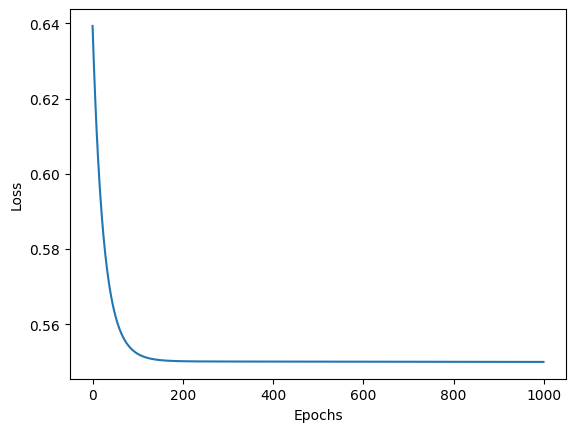

Training Losses are 
          0
0  0.677626
1  0.671871
2  0.666390
3  0.661169
4  0.656196
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


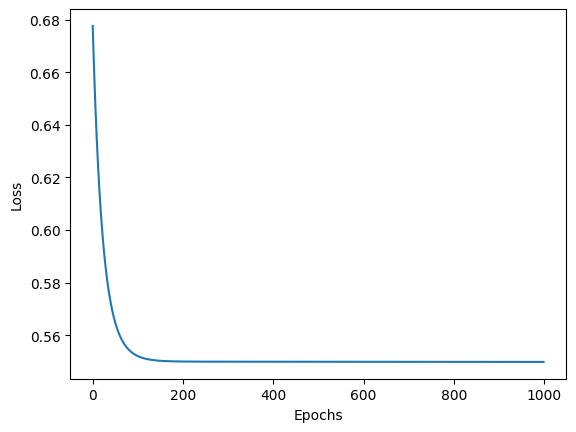

Training Losses are 
          0
0  0.781923
1  0.762487
2  0.744713
3  0.728466
4  0.713620
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


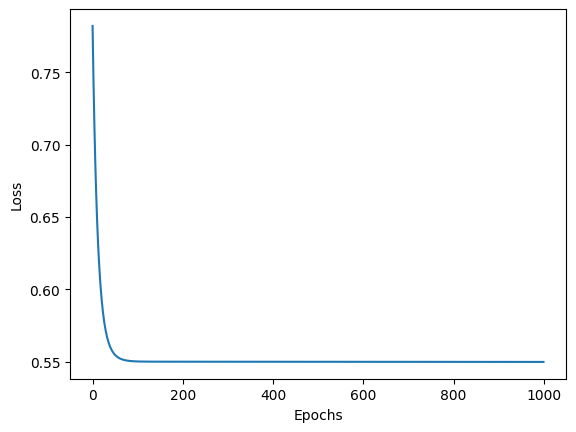

Training Losses are 
          0
0  0.717557
1  0.703737
2  0.691103
3  0.679552
4  0.668991
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


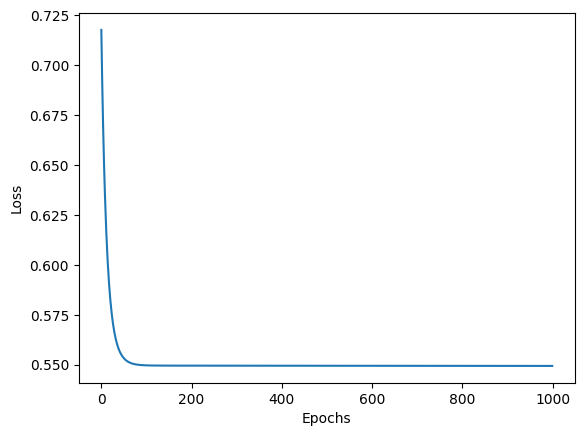

Training Losses are 
          0
0  0.677337
1  0.666738
2  0.657070
3  0.648250
4  0.640200
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


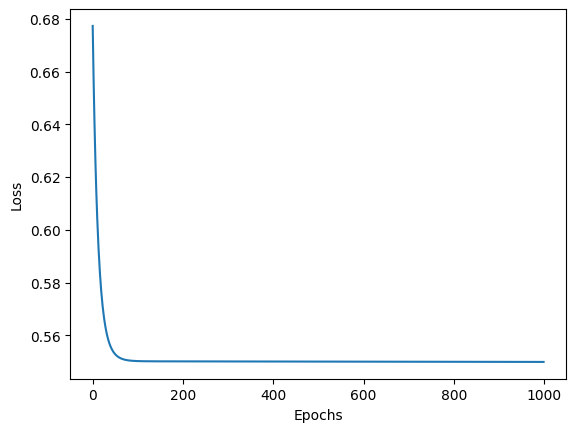

Training Losses are 
          0
0  0.676624
1  0.666198
2  0.656678
3  0.647982
4  0.640038
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


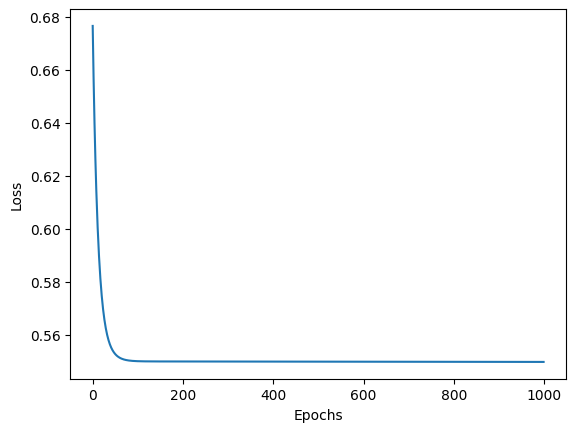

In [20]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(21,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()